<a href="https://colab.research.google.com/github/renzasprec/Loan-Approval/blob/main/LoanApproval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Libraries
import numpy as np
import pandas as pd

print(f'Numpy version: {np.__version__}')
print(f'Pandas version: {pd.__version__}')

Numpy version: 1.26.4
Pandas version: 2.2.3


# Exploratory Data Analysis

## Importing Data

In [4]:
# import libraries

# importing data
import kagglehub # import data from kaggle

print(f'Kagglehub version: {kagglehub.__version__}')

Kagglehub version: 0.2.7


C:\Users\anaconda3\envs\MachineLearning\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
# Download latest version
path = kagglehub.dataset_download("taweilo/loan-approval-classification-data", path = 'loan_data.csv')

print("Path to dataset files:", path)


Path to dataset files: C:\Users\Renz Asprec\.cache\kagglehub\datasets\taweilo\loan-approval-classification-data\versions\1\loan_data.csv


In [6]:
# load dataset
df = pd.read_csv(path)
df.head()

person_age person_gender person_education  person_income  person_emp_exp  \
0        22.0        female           Master        71948.0               0   
1        21.0        female      High School        12282.0               0   
2        25.0        female      High School        12438.0               3   
3        23.0        female         Bachelor        79753.0               0   
4        24.0          male           Master        66135.0               1   

  person_home_ownership  loan_amnt loan_intent  loan_int_rate  \
0                  RENT    35000.0    PERSONAL          16.02   
1                   OWN     1000.0   EDUCATION          11.14   
2              MORTGAGE     5500.0     MEDICAL          12.87   
3                  RENT    35000.0     MEDICAL          15.23   
4                  RENT    35000.0     MEDICAL          14.27   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                 0.49                         3.0           561   
1                 0.08                         2.0           504   
2                 0.44                         3.0           635   
3                 0.44                         2.0           675   
4                 0.53                         4.0           586   

  previous_loan_defaults_on_file  loan_status  
0                             No            1  
1                            Yes            0  
2                             No            1  
3                             No            1  
4                             No            1

## Data Inspection

Head of the data

In [7]:
display(df.head())

person_age person_gender person_education  person_income  person_emp_exp  \
0        22.0        female           Master        71948.0               0   
1        21.0        female      High School        12282.0               0   
2        25.0        female      High School        12438.0               3   
3        23.0        female         Bachelor        79753.0               0   
4        24.0          male           Master        66135.0               1   

  person_home_ownership  loan_amnt loan_intent  loan_int_rate  \
0                  RENT    35000.0    PERSONAL          16.02   
1                   OWN     1000.0   EDUCATION          11.14   
2              MORTGAGE     5500.0     MEDICAL          12.87   
3                  RENT    35000.0     MEDICAL          15.23   
4                  RENT    35000.0     MEDICAL          14.27   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                 0.49                         3.0           561   
1                 0.08                         2.0           504   
2                 0.44                         3.0           635   
3                 0.44                         2.0           675   
4                 0.53                         4.0           586   

  previous_loan_defaults_on_file  loan_status  
0                             No            1  
1                            Yes            0  
2                             No            1  
3                             No            1  
4                             No            1

Description of the data

In [8]:
display(df.describe())

person_age  person_income  person_emp_exp     loan_amnt  \
count  45000.000000   4.500000e+04    45000.000000  45000.000000   
mean      27.764178   8.031905e+04        5.410333   9583.157556   
std        6.045108   8.042250e+04        6.063532   6314.886691   
min       20.000000   8.000000e+03        0.000000    500.000000   
25%       24.000000   4.720400e+04        1.000000   5000.000000   
50%       26.000000   6.704800e+04        4.000000   8000.000000   
75%       30.000000   9.578925e+04        8.000000  12237.250000   
max      144.000000   7.200766e+06      125.000000  35000.000000   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
count   45000.000000         45000.000000                45000.000000   
mean       11.006606             0.139725                    5.867489   
std         2.978808             0.087212                    3.879702   
min         5.420000             0.000000                    2.000000   
25%         8.590000             0.070000                    3.000000   
50%        11.010000             0.120000                    4.000000   
75%        12.990000             0.190000                    8.000000   
max        20.000000             0.660000                   30.000000   

       credit_score   loan_status  
count  45000.000000  45000.000000  
mean     632.608756      0.222222  
std       50.435865      0.415744  
min      390.000000      0.000000  
25%      601.000000      0.000000  
50%      640.000000      0.000000  
75%      670.000000      0.000000  
max      850.000000      1.000000

Data information

In [9]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

None

Data shape

In [10]:
display(df.shape)

(45000, 14)

Unique values of the data

In [11]:
display(df.nunique())

person_age                           60
person_gender                         2
person_education                      5
person_income                     33989
person_emp_exp                       63
person_home_ownership                 4
loan_amnt                          4483
loan_intent                           6
loan_int_rate                      1302
loan_percent_income                  64
cb_person_cred_hist_length           29
credit_score                        340
previous_loan_defaults_on_file        2
loan_status                           2
dtype: int64

Check for missing values

In [12]:
# check if any of the data contains missing values
nas_sum = df.isna().any().sum()

print('There are {} features with missing data.'.format(nas_sum))

There are 0 features with missing data.


Getting the target variable

In [13]:
target = df.columns[-1]
print('The target variable is',target)

The target variable is loan_status


Feature names

In [14]:
feature_names = df.drop(target, axis=1).columns.to_list()

In [15]:
display(feature_names)

['person_age',
 'person_gender',
 'person_education',
 'person_income',
 'person_emp_exp',
 'person_home_ownership',
 'loan_amnt',
 'loan_intent',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length',
 'credit_score',
 'previous_loan_defaults_on_file']

Get the categorical features and the numerical features

Numerical features

In [16]:
numerical_features = df.drop(target, axis=1).select_dtypes(include=['float64','int64']).columns.to_list()
display(numerical_features)

['person_age',
 'person_income',
 'person_emp_exp',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length',
 'credit_score']

Categorical features

In [17]:
categorical_features = df.drop(target, axis=1).select_dtypes(include='object').columns.to_list()
display(categorical_features)

['person_gender',
 'person_education',
 'person_home_ownership',
 'loan_intent',
 'previous_loan_defaults_on_file']

## Data Analysis

In [18]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns

print(f'Seaborn version: {sns.__version__}')

Seaborn version: 0.13.2


In [19]:
# set theme
sns.set_theme()

### Univariate Analysis

Analysis of individual variables

#### Target Variable

Distribution of the target variable

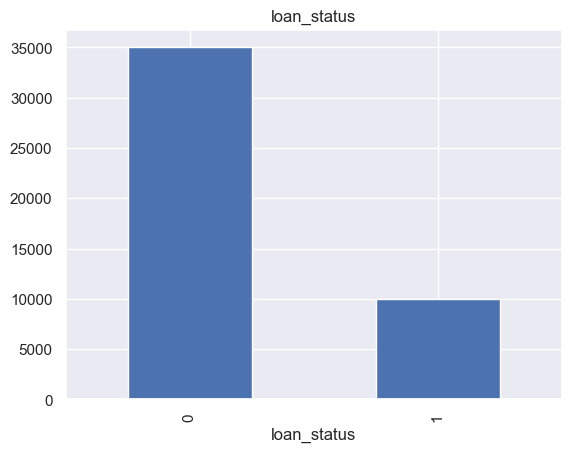

In [20]:
df[target].value_counts().plot.bar();
plt.title(target);
plt.show();

#### Numerical Features

Histograms of the numerical features

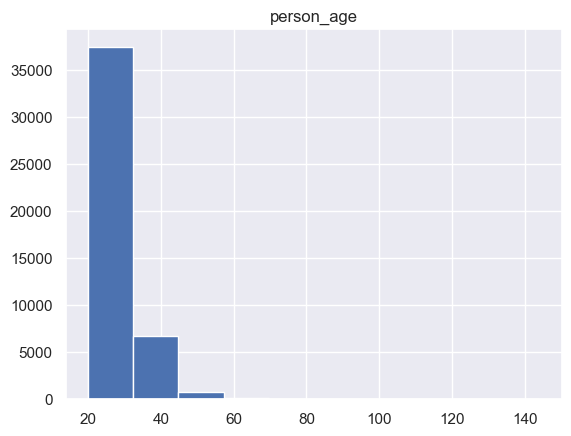

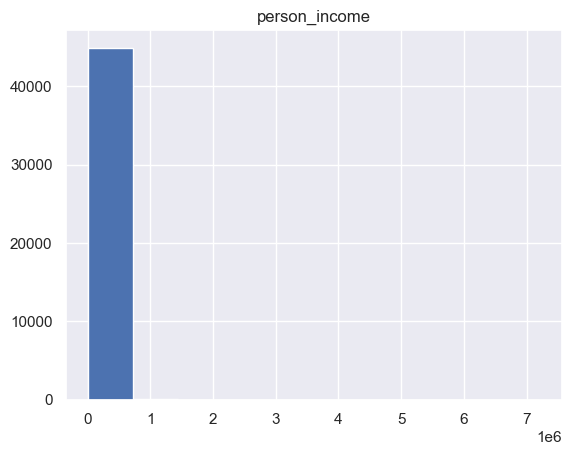

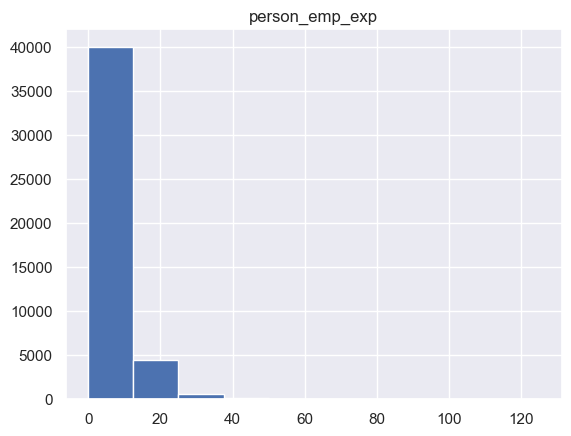

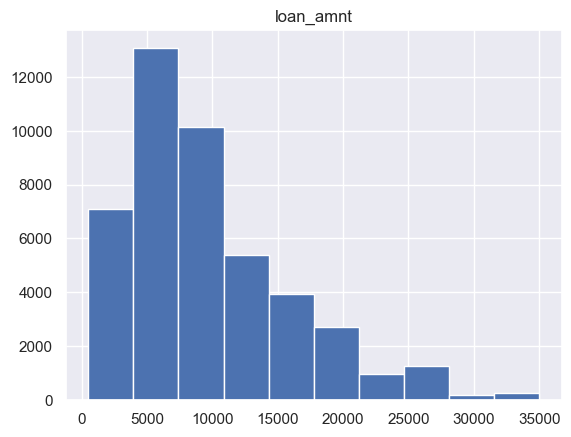

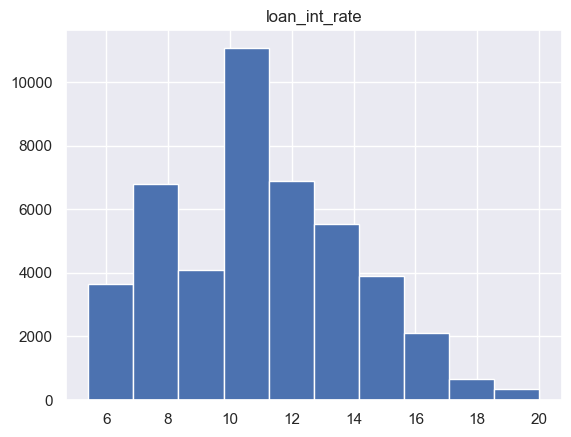

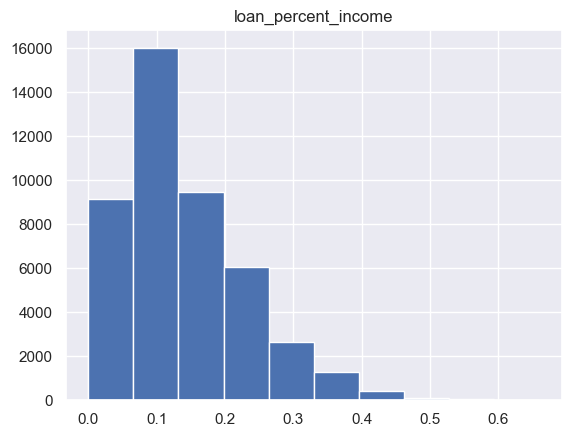

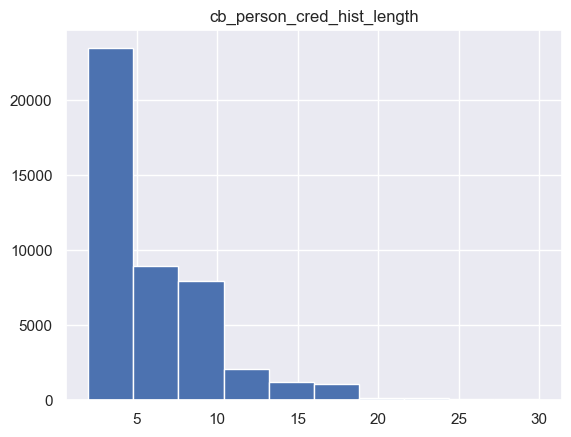

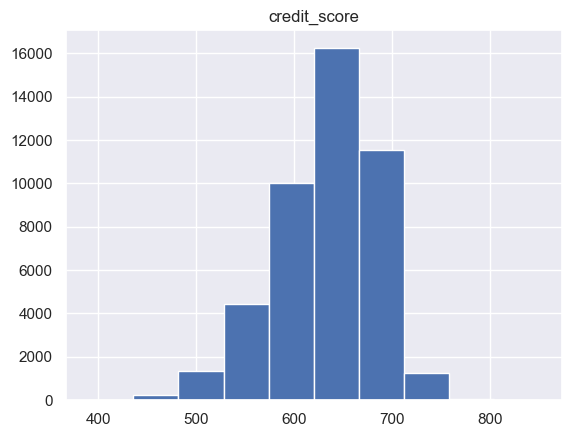

In [21]:
for feature in numerical_features:
    df[feature].hist();
    plt.title(feature);
    plt.show();

Box plots of the numerical features

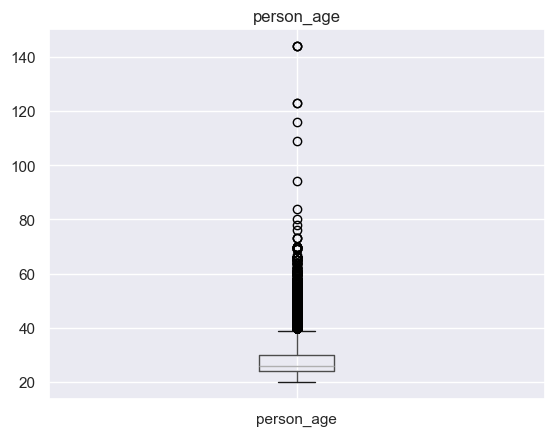

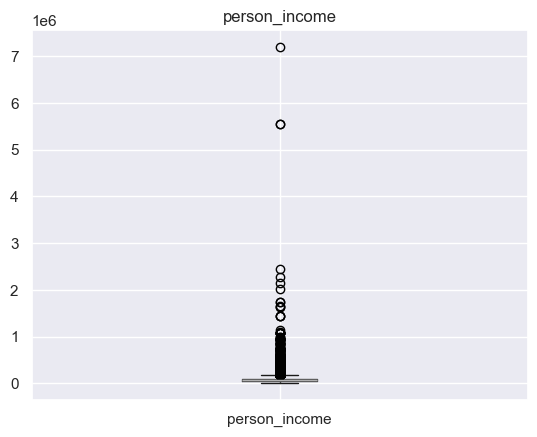

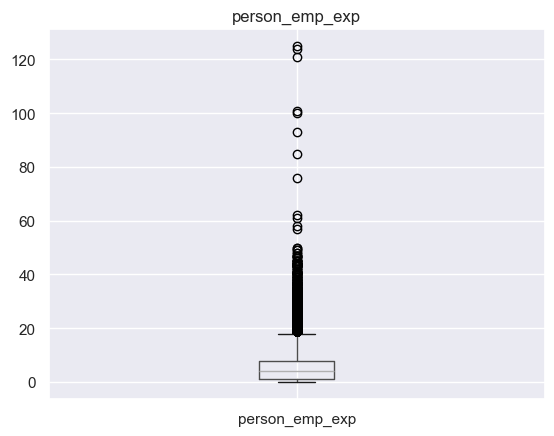

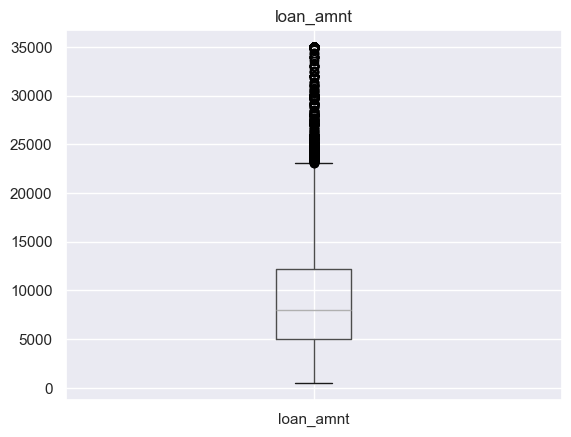

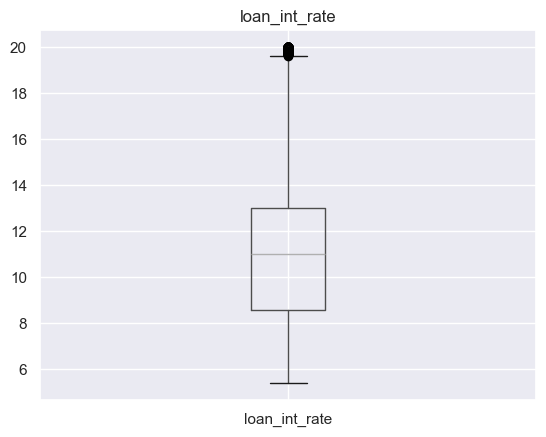

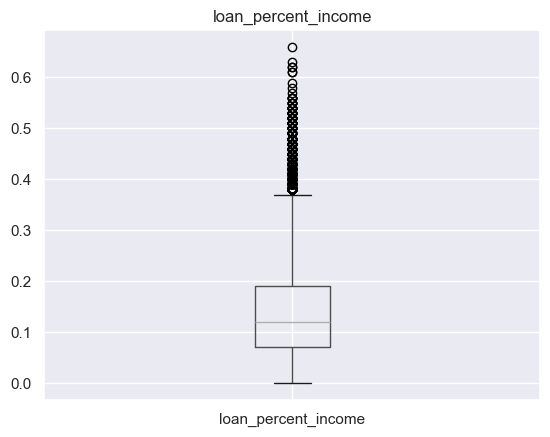

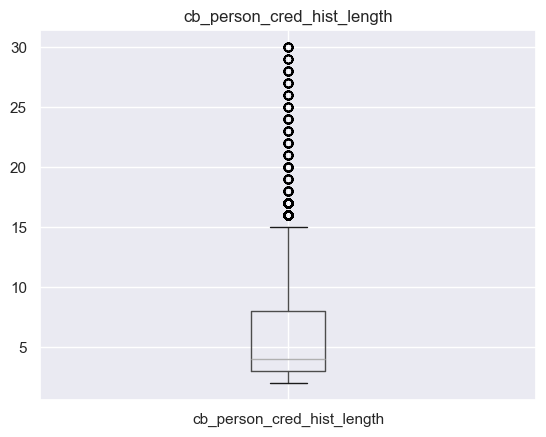

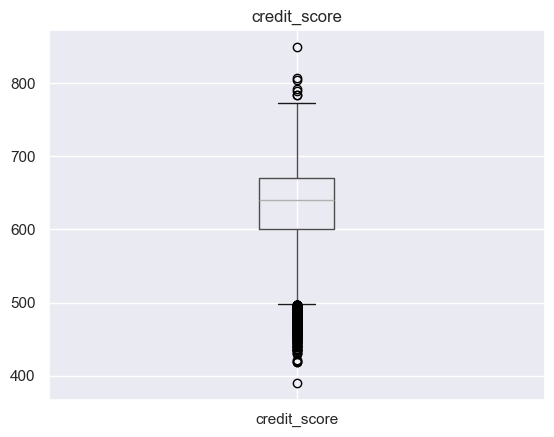

In [22]:
for feature in numerical_features:
    df[[feature]].boxplot();
    plt.title(feature);
    plt.show();

#### Categorical Feautures

Distributions of categorical features

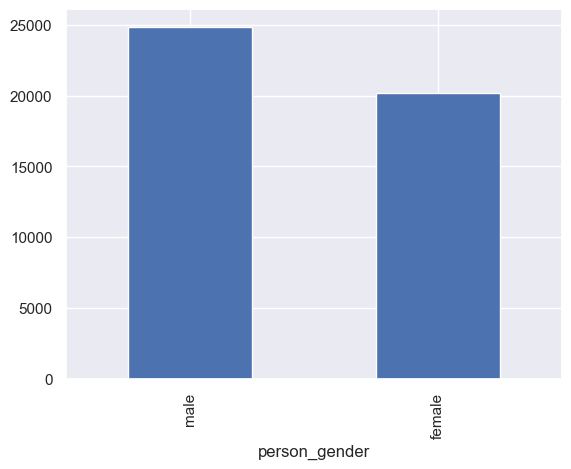

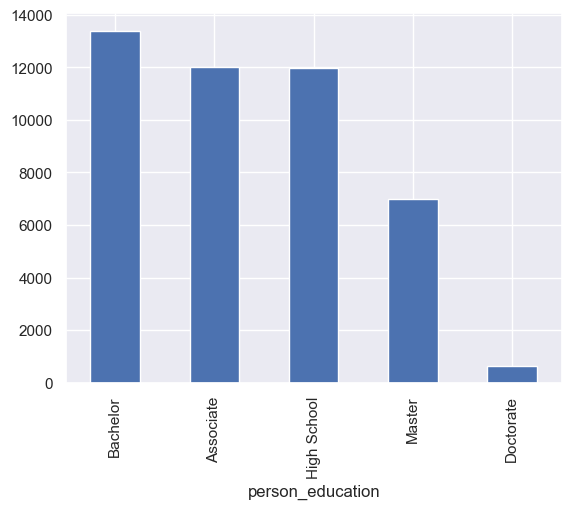

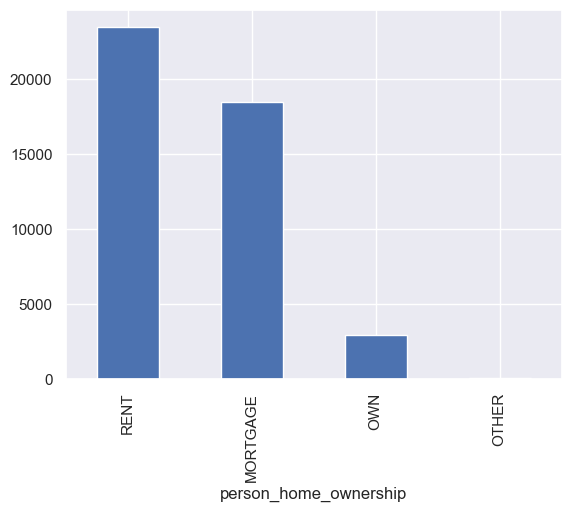

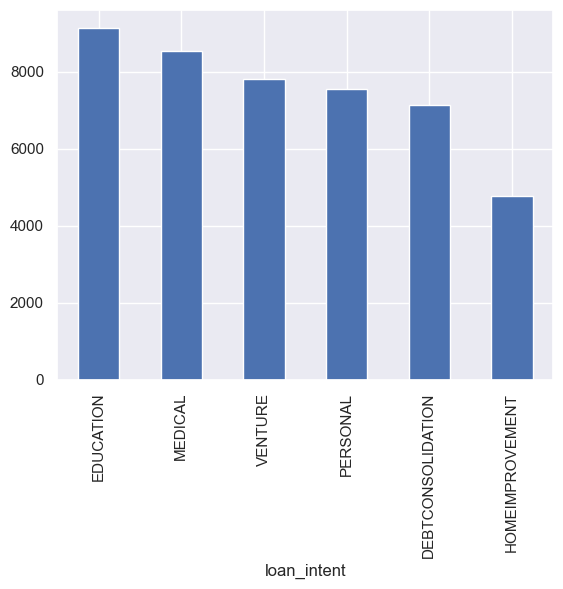

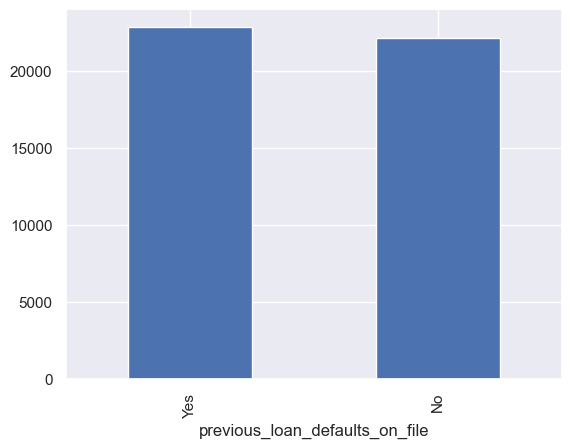

In [23]:
for feature in categorical_features:
    df[feature].value_counts().plot.bar();
    plt.xticks(rotation=90);
    plt.show();

### Bivariate Analysis

#### Numerical Features

Distribution of each numerical feature by loan status

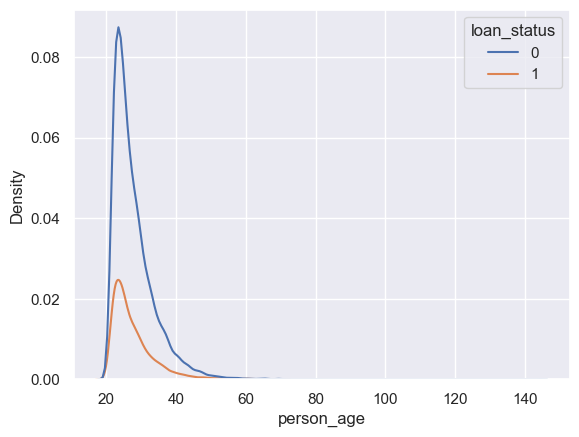

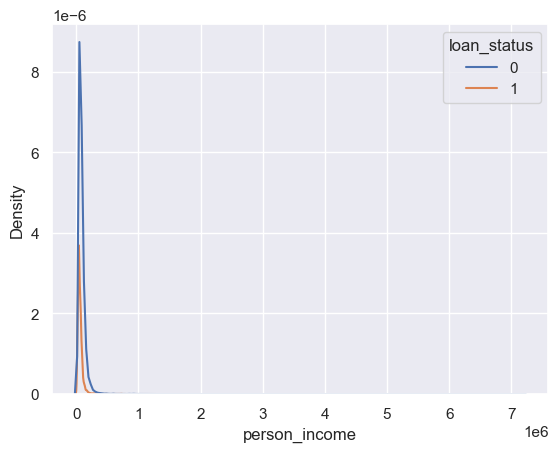

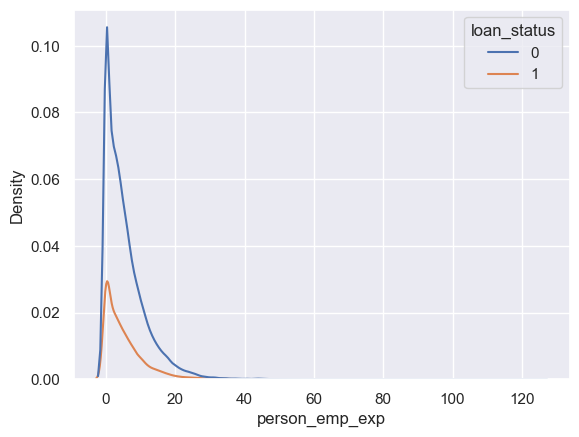

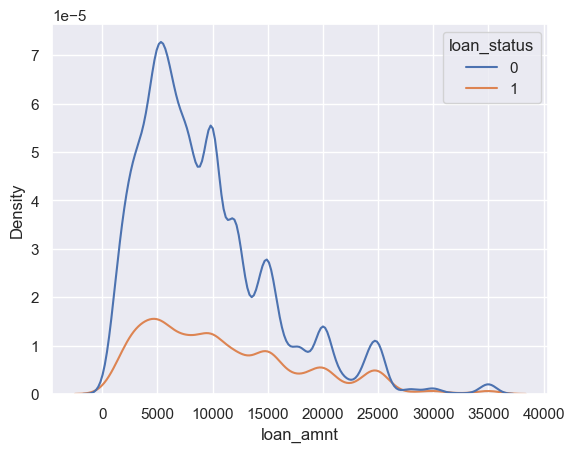

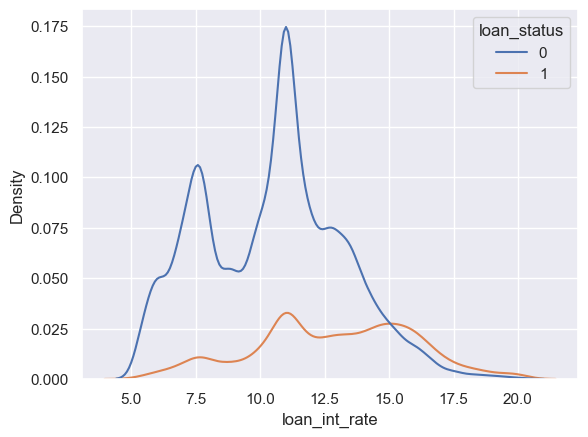

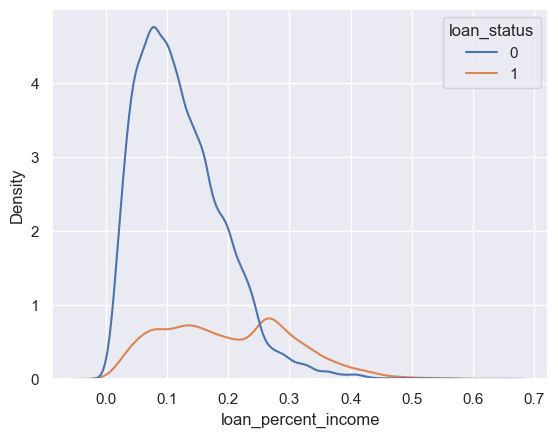

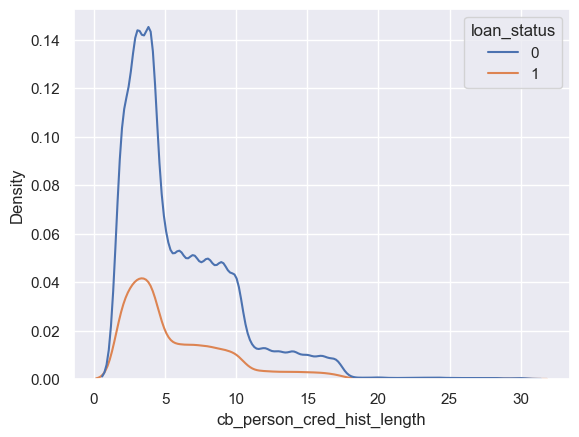

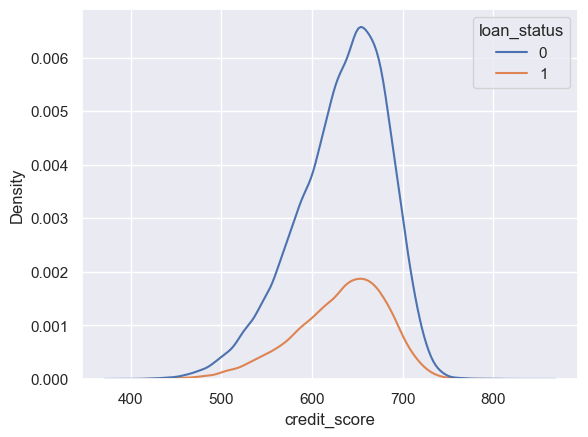

In [24]:
for feature in numerical_features:
        sns.kdeplot(data=df,x=feature,hue=target);
        plt.show();

Boxplots of each numerical feature by loan status

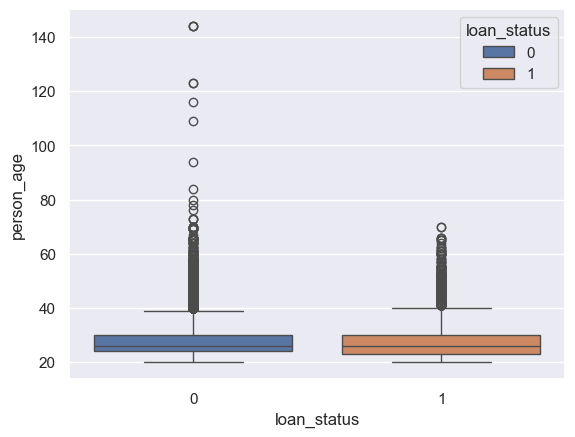

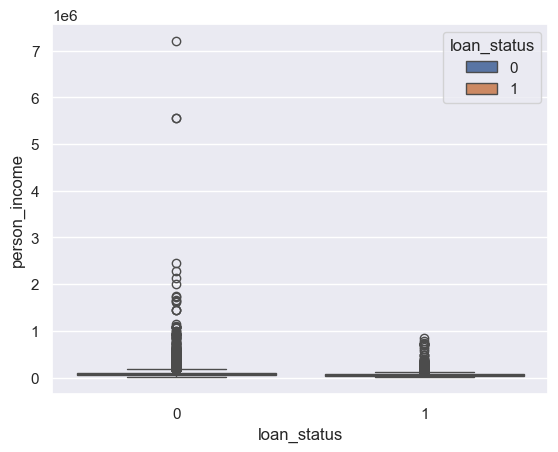

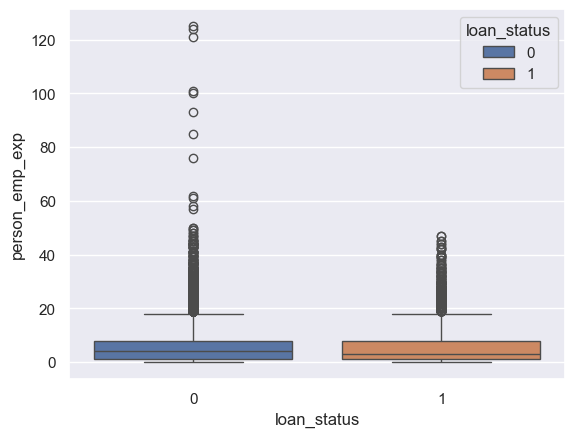

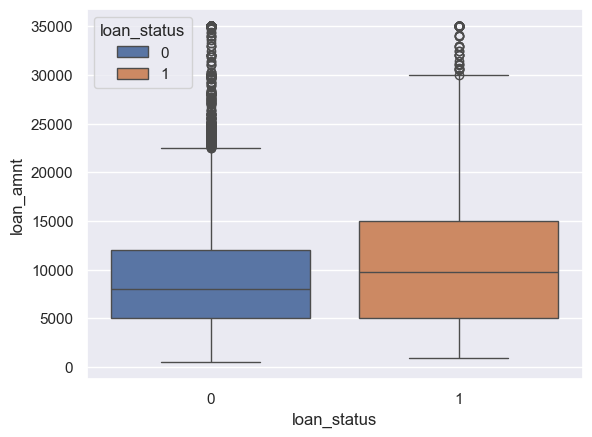

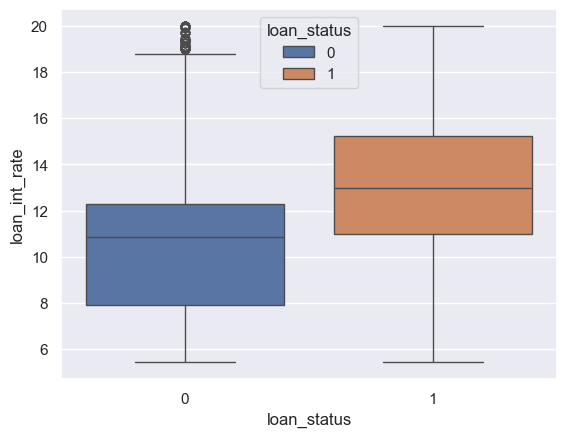

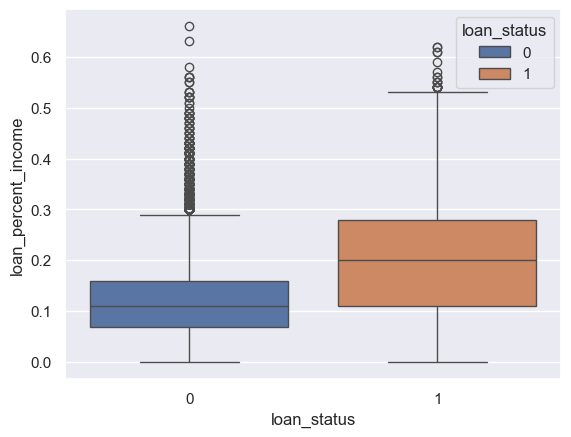

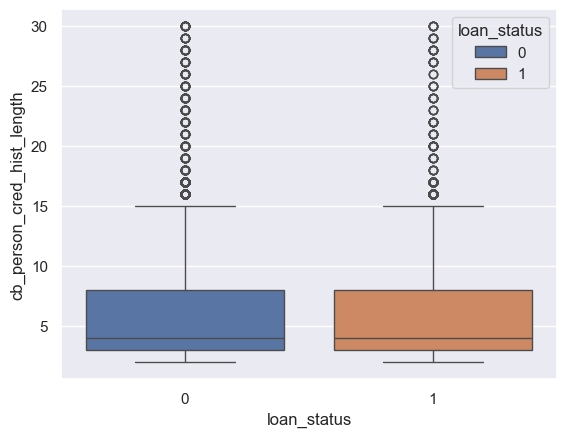

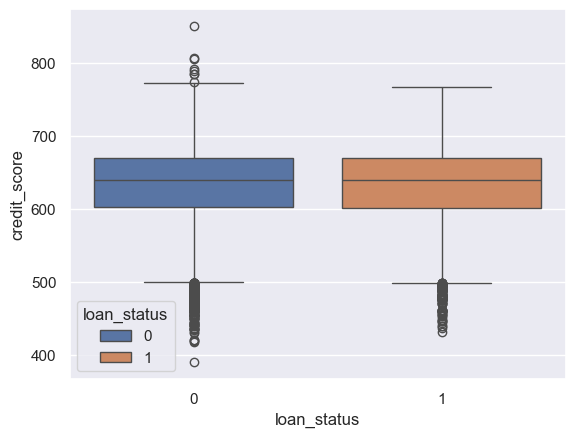

In [25]:
for feature in numerical_features:
    sns.boxplot(data=df,y=feature,x=target,hue=target);
    plt.show();

Cross tabulation of each categorical feature against the target variable, loan_status.

In [26]:
for feature in categorical_features:
    display(pd.crosstab(df[feature],df[target]))

loan_status        0     1
person_gender             
female         15674  4485
male           19326  5515

loan_status           0     1
person_education             
Associate          9378  2650
Bachelor          10381  3018
Doctorate           479   142
High School        9301  2671
Master             5461  1519

loan_status                0     1
person_home_ownership             
MORTGAGE               16345  2144
OTHER                     78    39
OWN                     2729   222
RENT                   15848  7595

loan_status           0     1
loan_intent                  
DEBTCONSOLIDATION  4982  2163
EDUCATION          7601  1552
HOMEIMPROVEMENT    3525  1258
MEDICAL            6170  2378
PERSONAL           6031  1521
VENTURE            6691  1128

loan_status                         0      1
previous_loan_defaults_on_file              
No                              12142  10000
Yes                             22858      0

#### Categorical Features

Plot of each categorical features grouped by loan status

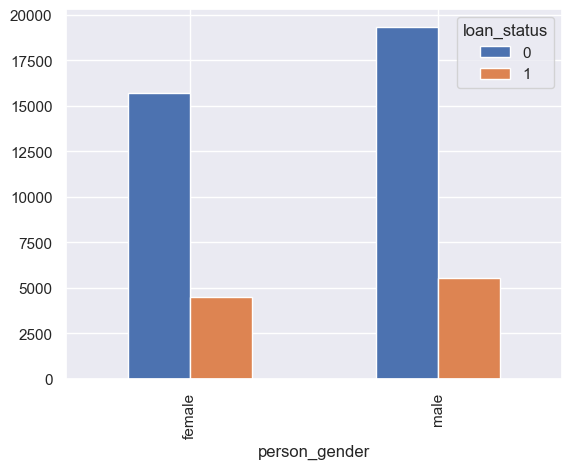

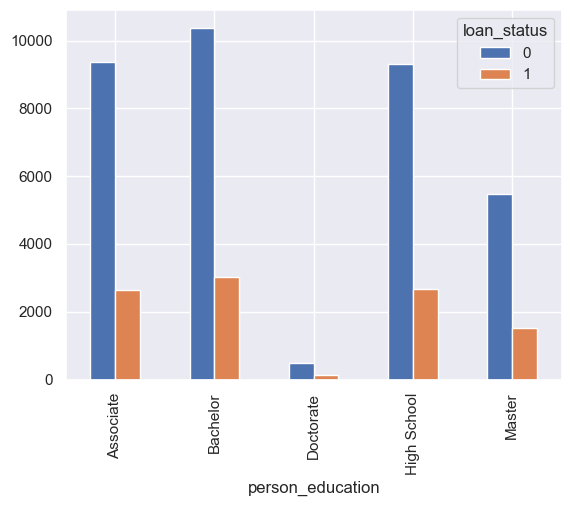

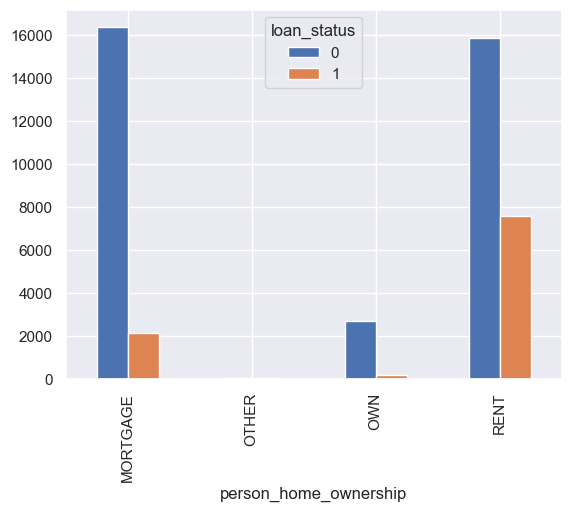

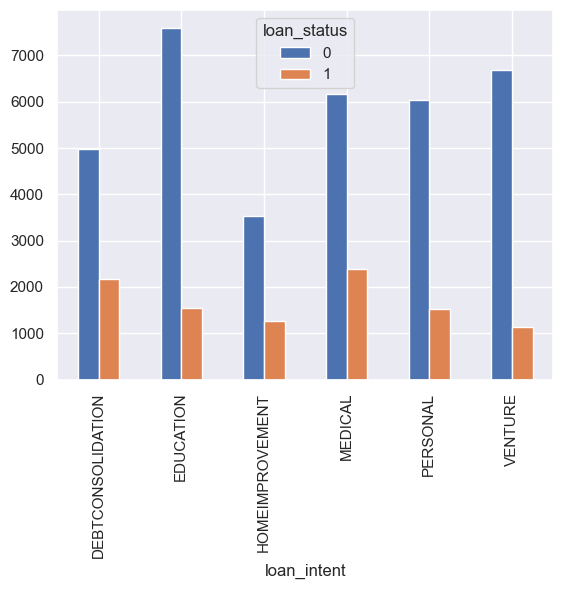

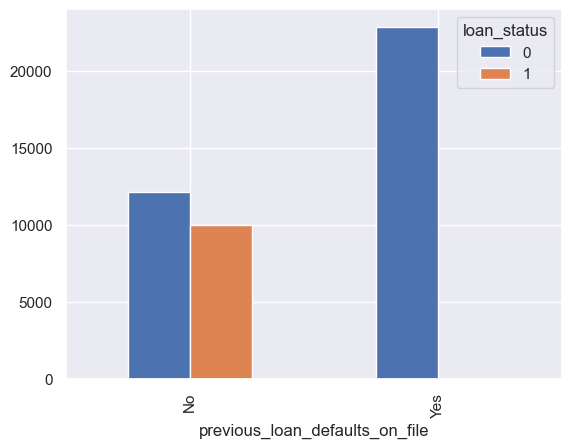

In [27]:
for feature in categorical_features:
    pd.crosstab(df[feature],df[target]).plot.bar()
    plt.show();

### Multivariate Analysis

Analysis of multiple variables

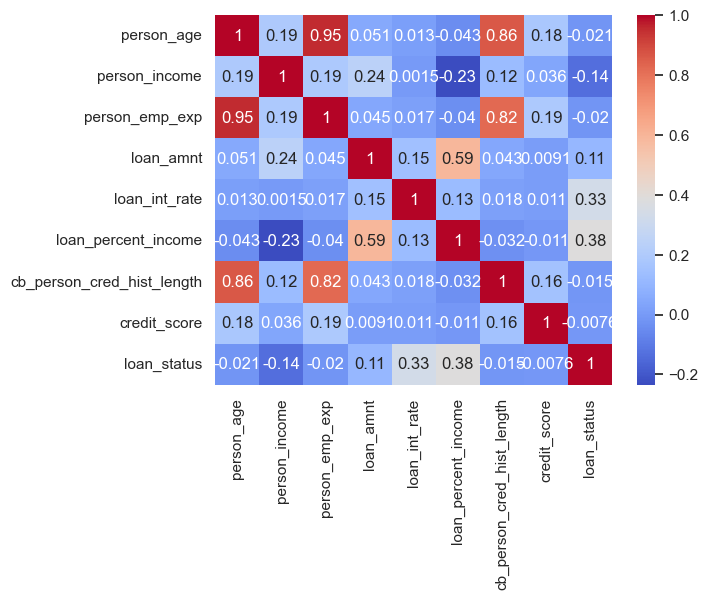

In [29]:
# correlation matrix
corr= df.corr(numeric_only=True)

# plot heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm');
plt.show();

C:\Users\anaconda3\envs\MachineLearning\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


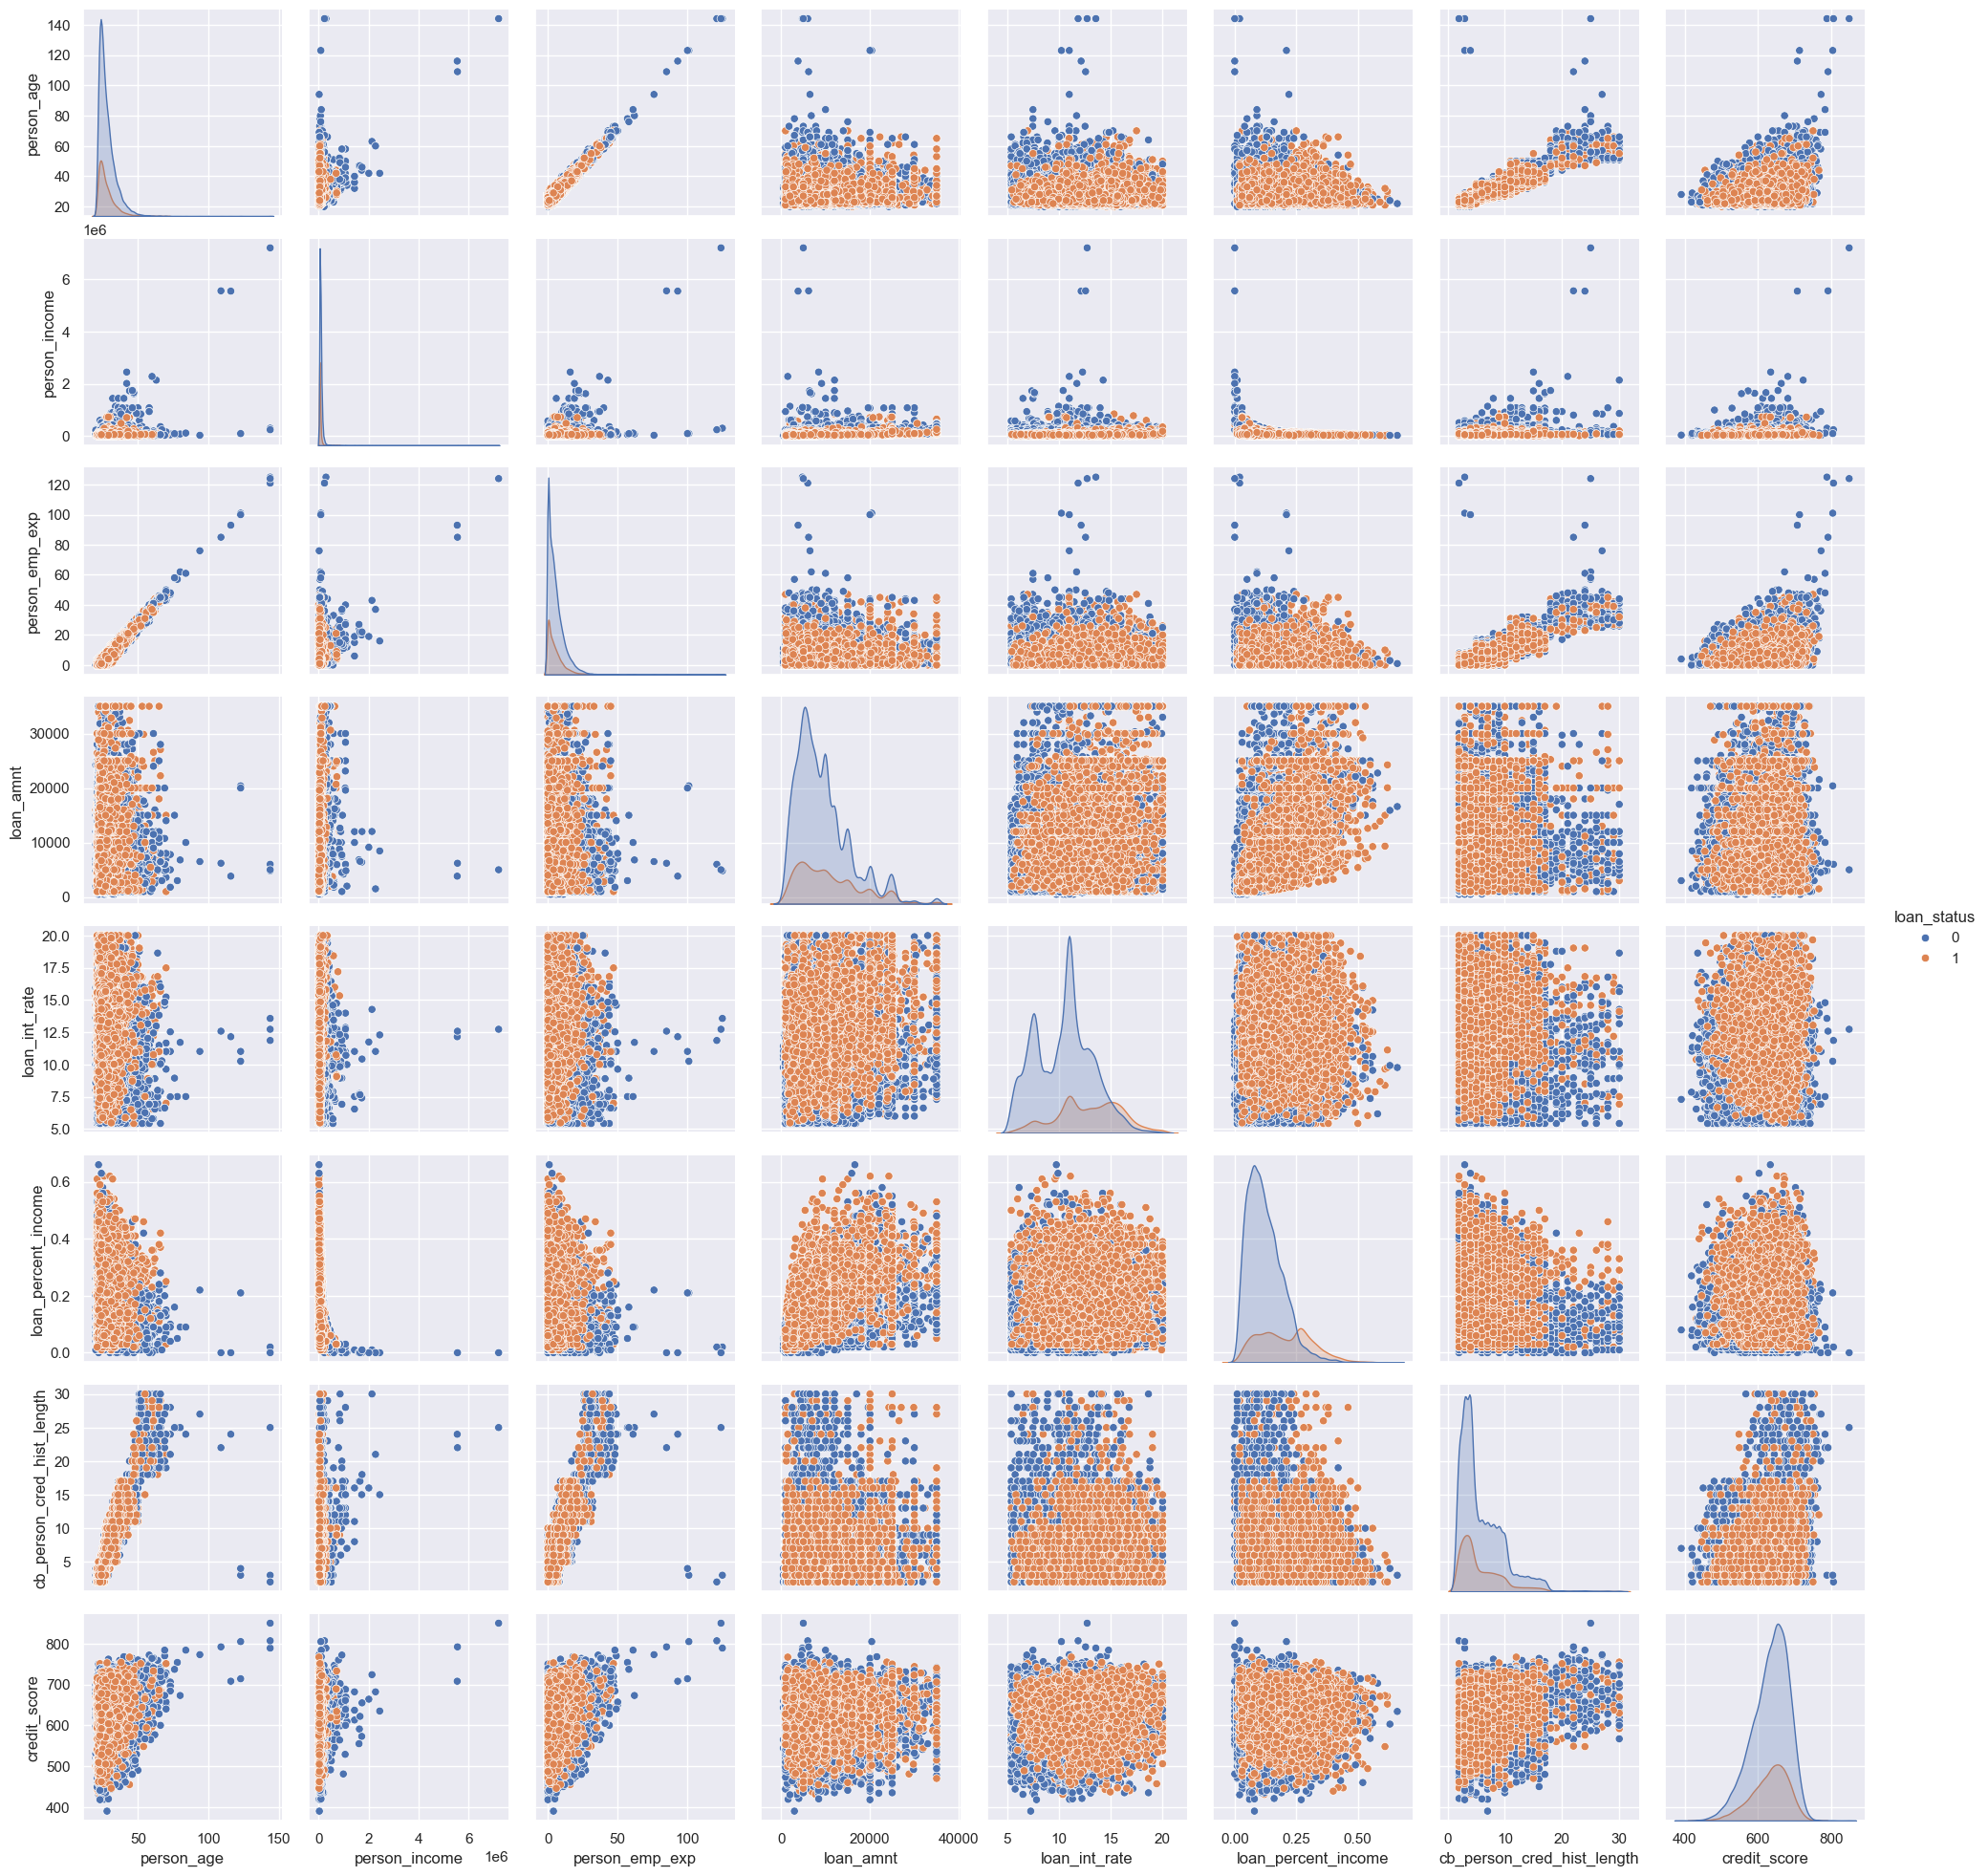

In [30]:
# Pairplot
sns.pairplot(data=df,hue=target);
plt.show();

# Feature Engineering

In [28]:
# !pip install scikit-learn==1.5.2

In [29]:
# import libraries

#
try:
  import sklearn
except ImportError:
  !pip install scikit-learn==1.5.2
  import sklearn

print(f'Sklearn version: {sklearn.__version__}')

# preprocessing
from sklearn.preprocessing import LabelBinarizer, OrdinalEncoder, OneHotEncoder

# scaling
from sklearn.preprocessing import StandardScaler

Sklearn version: 1.5.2


## Handling Outliers

Filtering variables for person_age and person_emp_exp.

For person_age, only include ages 90 and below.

In [30]:
df = df.loc[df['person_age']<=90]
df.shape

(44992, 14)

For person_emp_exp, only include years of employment experience less than or equal to 60 years

In [31]:
df = df.loc[df['person_emp_exp']<=60]
df.shape

(44990, 14)

## Feature Encoding

Transforming categorical features to numerical

Binarize 'person_gender' where '0' represents a 'female'.

In [32]:
# create a copy of the data
df_copy = df.copy().reset_index()

In [33]:
# binarize the person_gender feature
lb = LabelBinarizer()
df['person_gender'] = lb.fit_transform(df['person_gender'])
df.head()

person_age  person_gender person_education  person_income  person_emp_exp  \
0        22.0              0           Master        71948.0               0   
1        21.0              0      High School        12282.0               0   
2        25.0              0      High School        12438.0               3   
3        23.0              0         Bachelor        79753.0               0   
4        24.0              1           Master        66135.0               1   

  person_home_ownership  loan_amnt loan_intent  loan_int_rate  \
0                  RENT    35000.0    PERSONAL          16.02   
1                   OWN     1000.0   EDUCATION          11.14   
2              MORTGAGE     5500.0     MEDICAL          12.87   
3                  RENT    35000.0     MEDICAL          15.23   
4                  RENT    35000.0     MEDICAL          14.27   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                 0.49                         3.0           561   
1                 0.08                         2.0           504   
2                 0.44                         3.0           635   
3                 0.44                         2.0           675   
4                 0.53                         4.0           586   

  previous_loan_defaults_on_file  loan_status  
0                             No            1  
1                            Yes            0  
2                             No            1  
3                             No            1  
4                             No            1

Ordinal encoding for 'person_education'. The levels of education from lowest to highest is as follows: high school, associate, bachelor, master, doctorate

In [34]:
# unique values of person_education
np.unique(df.person_education)

array(['Associate', 'Bachelor', 'Doctorate', 'High School', 'Master'],
      dtype=object)

In [35]:
# ordinal encoding for 'person_education'
oe = OrdinalEncoder(categories=[['High School','Associate','Bachelor','Master','Doctorate']])
df['person_education'] = oe.fit_transform(df[['person_education']])
df.head()

person_age  person_gender  person_education  person_income  person_emp_exp  \
0        22.0              0               3.0        71948.0               0   
1        21.0              0               0.0        12282.0               0   
2        25.0              0               0.0        12438.0               3   
3        23.0              0               2.0        79753.0               0   
4        24.0              1               3.0        66135.0               1   

  person_home_ownership  loan_amnt loan_intent  loan_int_rate  \
0                  RENT    35000.0    PERSONAL          16.02   
1                   OWN     1000.0   EDUCATION          11.14   
2              MORTGAGE     5500.0     MEDICAL          12.87   
3                  RENT    35000.0     MEDICAL          15.23   
4                  RENT    35000.0     MEDICAL          14.27   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                 0.49                         3.0           561   
1                 0.08                         2.0           504   
2                 0.44                         3.0           635   
3                 0.44                         2.0           675   
4                 0.53                         4.0           586   

  previous_loan_defaults_on_file  loan_status  
0                             No            1  
1                            Yes            0  
2                             No            1  
3                             No            1  
4                             No            1

In [36]:
# unique values of person_home_ownership
np.unique(df.person_home_ownership)

array(['MORTGAGE', 'OTHER', 'OWN', 'RENT'], dtype=object)

One-hot encoding for 'person_home_ownership'.

In [37]:
# one hot-encoding of person_home_ownership, dropping 'OTHER'
ohe = OneHotEncoder(categories=[['OTHER', 'OWN', 'RENT', 'MORTGAGE']], drop='first', sparse_output=False)
ohe.fit(df[['person_home_ownership']])
encoded_home_ownership = ohe.transform(df[['person_home_ownership']])
encoded_home_ownership = pd.DataFrame(encoded_home_ownership, columns=ohe.get_feature_names_out())
new_features = ohe.get_feature_names_out().tolist()
df = pd.concat([df.drop('person_home_ownership', axis=1).reset_index(drop=True), encoded_home_ownership], axis=1)
df.head()

person_age  person_gender  person_education  person_income  person_emp_exp  \
0        22.0              0               3.0        71948.0               0   
1        21.0              0               0.0        12282.0               0   
2        25.0              0               0.0        12438.0               3   
3        23.0              0               2.0        79753.0               0   
4        24.0              1               3.0        66135.0               1   

   loan_amnt loan_intent  loan_int_rate  loan_percent_income  \
0    35000.0    PERSONAL          16.02                 0.49   
1     1000.0   EDUCATION          11.14                 0.08   
2     5500.0     MEDICAL          12.87                 0.44   
3    35000.0     MEDICAL          15.23                 0.44   
4    35000.0     MEDICAL          14.27                 0.53   

   cb_person_cred_hist_length  credit_score previous_loan_defaults_on_file  \
0                         3.0           561                             No   
1                         2.0           504                            Yes   
2                         3.0           635                             No   
3                         2.0           675                             No   
4                         4.0           586                             No   

   loan_status  person_home_ownership_OWN  person_home_ownership_RENT  \
0            1                        0.0                         1.0   
1            0                        1.0                         0.0   
2            1                        0.0                         0.0   
3            1                        0.0                         1.0   
4            1                        0.0                         1.0   

   person_home_ownership_MORTGAGE  
0                             0.0  
1                             0.0  
2                             1.0  
3                             0.0  
4                             0.0

In [38]:
# unique features of loan_intent without dropping any features
np.unique(df.loan_intent)

array(['DEBTCONSOLIDATION', 'EDUCATION', 'HOMEIMPROVEMENT', 'MEDICAL',
       'PERSONAL', 'VENTURE'], dtype=object)

In [39]:
# one-hot-encoding of loan_intent
ohe = OneHotEncoder(categories=[['DEBTCONSOLIDATION', 'EDUCATION', 'HOMEIMPROVEMENT', 'MEDICAL',
       'PERSONAL', 'VENTURE']], sparse_output=False)
encoded_loan_intent = ohe.fit_transform(df[['loan_intent']])
encoded_loan_intent = pd.DataFrame(encoded_loan_intent, columns=ohe.get_feature_names_out())
new_features += ohe.get_feature_names_out().tolist()
df = pd.concat([df.drop('loan_intent',axis=1).reset_index(drop=True), encoded_loan_intent], axis=1)
df.head()

person_age  person_gender  person_education  person_income  person_emp_exp  \
0        22.0              0               3.0        71948.0               0   
1        21.0              0               0.0        12282.0               0   
2        25.0              0               0.0        12438.0               3   
3        23.0              0               2.0        79753.0               0   
4        24.0              1               3.0        66135.0               1   

   loan_amnt  loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
0    35000.0          16.02                 0.49                         3.0   
1     1000.0          11.14                 0.08                         2.0   
2     5500.0          12.87                 0.44                         3.0   
3    35000.0          15.23                 0.44                         2.0   
4    35000.0          14.27                 0.53                         4.0   

   credit_score  ... loan_status  person_home_ownership_OWN  \
0           561  ...           1                        0.0   
1           504  ...           0                        1.0   
2           635  ...           1                        0.0   
3           675  ...           1                        0.0   
4           586  ...           1                        0.0   

   person_home_ownership_RENT  person_home_ownership_MORTGAGE  \
0                         1.0                             0.0   
1                         0.0                             0.0   
2                         0.0                             1.0   
3                         1.0                             0.0   
4                         1.0                             0.0   

   loan_intent_DEBTCONSOLIDATION  loan_intent_EDUCATION  \
0                            0.0                    0.0   
1                            0.0                    1.0   
2                            0.0                    0.0   
3                            0.0                    0.0   
4                            0.0                    0.0   

   loan_intent_HOMEIMPROVEMENT  loan_intent_MEDICAL  loan_intent_PERSONAL  \
0                          0.0                  0.0                   1.0   
1                          0.0                  0.0                   0.0   
2                          0.0                  1.0                   0.0   
3                          0.0                  1.0                   0.0   
4                          0.0                  1.0                   0.0   

   loan_intent_VENTURE  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0  

[5 rows x 21 columns]

In [40]:
# binarize 'previous_loan_defaults_on_file'
lb = LabelBinarizer()
df['previous_loan_defaults_on_file'] = lb.fit_transform(df['previous_loan_defaults_on_file'])
df.head()

person_age  person_gender  person_education  person_income  person_emp_exp  \
0        22.0              0               3.0        71948.0               0   
1        21.0              0               0.0        12282.0               0   
2        25.0              0               0.0        12438.0               3   
3        23.0              0               2.0        79753.0               0   
4        24.0              1               3.0        66135.0               1   

   loan_amnt  loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
0    35000.0          16.02                 0.49                         3.0   
1     1000.0          11.14                 0.08                         2.0   
2     5500.0          12.87                 0.44                         3.0   
3    35000.0          15.23                 0.44                         2.0   
4    35000.0          14.27                 0.53                         4.0   

   credit_score  ...  loan_status  person_home_ownership_OWN  \
0           561  ...            1                        0.0   
1           504  ...            0                        1.0   
2           635  ...            1                        0.0   
3           675  ...            1                        0.0   
4           586  ...            1                        0.0   

   person_home_ownership_RENT  person_home_ownership_MORTGAGE  \
0                         1.0                             0.0   
1                         0.0                             0.0   
2                         0.0                             1.0   
3                         1.0                             0.0   
4                         1.0                             0.0   

   loan_intent_DEBTCONSOLIDATION  loan_intent_EDUCATION  \
0                            0.0                    0.0   
1                            0.0                    1.0   
2                            0.0                    0.0   
3                            0.0                    0.0   
4                            0.0                    0.0   

   loan_intent_HOMEIMPROVEMENT  loan_intent_MEDICAL  loan_intent_PERSONAL  \
0                          0.0                  0.0                   1.0   
1                          0.0                  0.0                   0.0   
2                          0.0                  1.0                   0.0   
3                          0.0                  1.0                   0.0   
4                          0.0                  1.0                   0.0   

   loan_intent_VENTURE  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0  

[5 rows x 21 columns]

In [41]:
# inspect new feature names
print(df.columns)

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income',
       'cb_person_cred_hist_length', 'credit_score',
       'previous_loan_defaults_on_file', 'loan_status',
       'person_home_ownership_OWN', 'person_home_ownership_RENT',
       'person_home_ownership_MORTGAGE', 'loan_intent_DEBTCONSOLIDATION',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE'],
      dtype='object')


In [42]:
# number of features after encoding
print(f'The number of features for the encoded dataset is {df.drop(target, axis=1).shape[1]}')

The number of features for the encoded dataset is 20


In [43]:
# update categorical_features with the new features generated from encoding
categorical_features_new = categorical_features.copy()
categorical_features_new += new_features
renamed_features = ['person_home_ownership','loan_intent']
for feature in renamed_features:
    categorical_features_new.remove(feature)

In [44]:
# encoded feature names
feature_names_enc = df.drop(target, axis=1).columns.tolist()

## Feature Scaling

Standardizing numerical features

In [45]:
# standardizing the numerical features
std_scaler = StandardScaler()
df[numerical_features] = std_scaler.fit_transform(df[numerical_features])
df.head()

person_age  person_gender  person_education  person_income  person_emp_exp  \
0   -0.975222              0               3.0      -0.125718       -0.912694   
1   -1.144987              0               0.0      -1.067968       -0.912694   
2   -0.465927              0               0.0      -1.065505       -0.404745   
3   -0.805457              0               2.0      -0.002461       -0.912694   
4   -0.635692              1               3.0      -0.217517       -0.743378   

   loan_amnt  loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
0   4.024870       1.682942             4.016448                   -0.739616   
1  -1.359211       0.044810            -0.684999                   -0.997749   
2  -0.646612       0.625541             3.443101                   -0.739616   
3   4.024870       1.417752             3.443101                   -0.997749   
4   4.024870       1.095497             4.475125                   -0.481484   

   credit_score  ...  loan_status  person_home_ownership_OWN  \
0     -1.420381  ...            1                        0.0   
1     -2.551473  ...            0                        1.0   
2      0.048055  ...            1                        0.0   
3      0.841804  ...            1                        0.0   
4     -0.924287  ...            1                        0.0   

   person_home_ownership_RENT  person_home_ownership_MORTGAGE  \
0                         1.0                             0.0   
1                         0.0                             0.0   
2                         0.0                             1.0   
3                         1.0                             0.0   
4                         1.0                             0.0   

   loan_intent_DEBTCONSOLIDATION  loan_intent_EDUCATION  \
0                            0.0                    0.0   
1                            0.0                    1.0   
2                            0.0                    0.0   
3                            0.0                    0.0   
4                            0.0                    0.0   

   loan_intent_HOMEIMPROVEMENT  loan_intent_MEDICAL  loan_intent_PERSONAL  \
0                          0.0                  0.0                   1.0   
1                          0.0                  0.0                   0.0   
2                          0.0                  1.0                   0.0   
3                          0.0                  1.0                   0.0   
4                          0.0                  1.0                   0.0   

   loan_intent_VENTURE  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0  

[5 rows x 21 columns]

# Model Fitting

In [46]:
# import libraries

# model selection
from sklearn.model_selection import train_test_split, StratifiedKFold
# feature selection
from sklearn.feature_selection import RFECV
# dummy
from sklearn.dummy import DummyClassifier
# logistic regression
from sklearn.linear_model import LogisticRegression
# ensemble models
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier, AdaBoostClassifier
# trees
from sklearn.tree import DecisionTreeClassifier
# model selection
from sklearn.model_selection import GridSearchCV
# metrics
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, fbeta_score, make_scorer, precision_recall_curve
# inspection
from sklearn.inspection import permutation_importance

## Data Splitting

In [47]:
# store data to X and y variables
X = df.drop(target, axis=1)
y = df[target].values

In [48]:
# split to 70% train, 15% validation, and 15% test data. Split is stratified by y. Use a random_state of 1
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1, stratify=y)
X_validation, X_test, y_validation, y_test = train_test_split(X_test, y_test, train_size=0.5, random_state=1, stratify=y_test)

In [49]:
X_train.shape, y_train.shape, X_validation.shape, y_validation.shape

((31492, 20), (31492,), (6749, 20), (6749,))

## Baseline Classifier

In [50]:
# create a dummy classifier with random_state=1 and strategy = 'uniform'
clf_d = DummyClassifier(random_state=1, strategy='uniform')
clf_d.fit(X_train, y_train)

DummyClassifier(random_state=1, strategy='uniform')

In [51]:
# predict with the validation data
y_pred_dummy = clf_d.predict(X_validation)

The metrics to be used for model evaluation is F-beta with beta equal to 0.5. This would give twice importance to `precision` since for loan approval, you would want to avoid having high false positives (approving loans that would eventually default), but also you want to have high `recall` (approve loans that should actually be approved).

### Evaluation on Validation Data

In [52]:
# score
print(classification_report(y_validation,y_pred_dummy))

# fbeta
print(f'{fbeta_score(y_validation,y_pred_dummy, beta=0.5):.2f}')

              precision    recall  f1-score   support

           0       0.78      0.50      0.61      5249
           1       0.22      0.50      0.31      1500

    accuracy                           0.50      6749
   macro avg       0.50      0.50      0.46      6749
weighted avg       0.65      0.50      0.54      6749

0.25


In [144]:
# initialize dictionary for storing metrics
summary = {
    'Models' : [],
    'Precision' : [],
    'Accuracy' : [],
    'Recall' : [],
    'F1 Score' : [],
    'F-beta (beta=0.5)' : []
}

In [145]:
def update_summary(model_name, y_pred, summary):
  summary['Models'].append(model_name)
  summary['Precision'].append(precision_score(y_validation, y_pred))
  summary['Accuracy'].append(accuracy_score(y_validation, y_pred))
  summary['Recall'].append(recall_score(y_validation, y_pred))
  summary['F1 Score'].append(f1_score(y_validation, y_pred))
  summary['F-beta (beta=0.5)'].append(fbeta_score(y_validation, y_pred, beta=0.5))
  return summary

summary = update_summary('Dummy Classifier', y_pred_dummy, summary)
display(pd.DataFrame(summary))

Models  Precision  Accuracy    Recall  F1 Score  \
0  Dummy Classifier   0.221562  0.499926  0.497333  0.306554   

   F-beta (beta=0.5)  
0           0.249198

## Logistic Regression

In [55]:
# create a LogisticRegression model
clf_logistic = LogisticRegression(penalty='l2', tol=1e-4, class_weight='balanced', n_jobs=-1)

### Fitting

#### Cross-validation

In [56]:
# tuning parameters
param_grid = {
    'max_iter' : [100,300,500],
    'C':[0.1, 1, 10], # default value 1, and a high and low value
    'solver':['lbfgs','liblinear','sag','saga']
}

Cross-validation of LogisticRegression

In [57]:
# cross-validation
gs = GridSearchCV(
    estimator = clf_logistic,
    param_grid = param_grid,
    scoring = make_scorer(fbeta_score, beta=0.5),
    n_jobs = -1,
    cv = 5)
gs.fit(X_train, y_train)

C:\Users\anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced', n_jobs=-1),
             n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'max_iter': [100, 300, 500],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
             scoring=make_scorer(fbeta_score, response_method='predict', beta=0.5))

In [58]:
# best estimator
gs.best_estimator_

LogisticRegression(C=10, class_weight='balanced', max_iter=300, n_jobs=-1,
                   solver='sag')

In [59]:
# best parameters
gs.best_params_

{'C': 10, 'max_iter': 300, 'solver': 'sag'}

In [60]:
# predict with the best estimator
clf_logistic = gs.best_estimator_
y_pred_logistic = clf_logistic.predict(X_validation)

### Evaluation on Validation Data

In [61]:
# score
print(classification_report(y_validation, y_pred_logistic))

# fbeta
print(f'{fbeta_score(y_validation, y_pred_logistic, beta=0.5):.2f}')

              precision    recall  f1-score   support

           0       0.97      0.85      0.91      5249
           1       0.64      0.92      0.76      1500

    accuracy                           0.87      6749
   macro avg       0.81      0.89      0.83      6749
weighted avg       0.90      0.87      0.88      6749

0.68


In [146]:
# update summary
summary = update_summary('Logistic Regression', y_pred_logistic, summary)

display(pd.DataFrame(summary))

Models  Precision  Accuracy    Recall  F1 Score  \
0     Dummy Classifier   0.221562  0.499926  0.497333  0.306554   
1  Logistic Regression   0.643523  0.869018  0.920667  0.757543   

   F-beta (beta=0.5)  
0           0.249198  
1           0.684748

## Random Forest

Investigate the tree depth of a fully grown tree

In [64]:
# create DecisionTreeClassifer instance
clf_tree = DecisionTreeClassifier(
    random_state = 1,
    class_weight = 'balanced'
)

In [65]:
# fit tree
clf_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

In [66]:
# check tree depth
clf_tree.get_depth()

33

Use the above tree depth as a basis for `max_depth` for the forest.

In [67]:
# create a RandomForestClassifier object
clf_rf = RandomForestClassifier(
    random_state = 1,
    bootstrap = True,
    oob_score = f1_score,
    class_weight = 'balanced_subsample',
    n_jobs = -1
)

### Fitting

##### Cross-validation of RF model

In [68]:
# tuning parameters
param_grid = {
    'n_estimators' : [100, 200, 300], # explore higher values
    'max_depth': [None, 15],
    'max_features' : ['sqrt', None], # exclude None to promote generalization
    'ccp_alpha': [0.001, 0.01],
}

In [69]:
# cross-validation
gs = GridSearchCV(
    clf_rf,
    param_grid,
    n_jobs = -1,
    cv = 5,
    scoring = make_scorer(fbeta_score, beta = 0.5)
)

gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced_subsample',
                                              n_jobs=-1,
                                              oob_score=<function f1_score at 0x0000016113D85120>,
                                              random_state=1),
             n_jobs=-1,
             param_grid={'ccp_alpha': [0.001, 0.01], 'max_depth': [None, 15],
                         'max_features': ['sqrt', None],
                         'n_estimators': [100, 200, 300]},
             scoring=make_scorer(fbeta_score, response_method='predict', beta=0.5))

In [70]:
# best estimator
gs.best_estimator_
gs.best_score_

0.7008000596576942

In [71]:
# best parameters
gs.best_params_

{'ccp_alpha': 0.001,
 'max_depth': None,
 'max_features': None,
 'n_estimators': 300}

Investigate performance of the model

In [72]:
clf_rf = gs.best_estimator_

In [73]:
# store f-betas for the train data
fbetas_train = [fbeta_score(y_train, estimator.predict(X_train.values), beta = 0.5) for estimator in clf_rf.estimators_]

In [74]:
# plot f-betas
fbetas = pd.DataFrame(
    {
        'tree' : range(1, len(clf_rf.estimators_)+1),
        'train' : fbetas_train,
    }
)

Text(0, 0.5, 'f-beta')

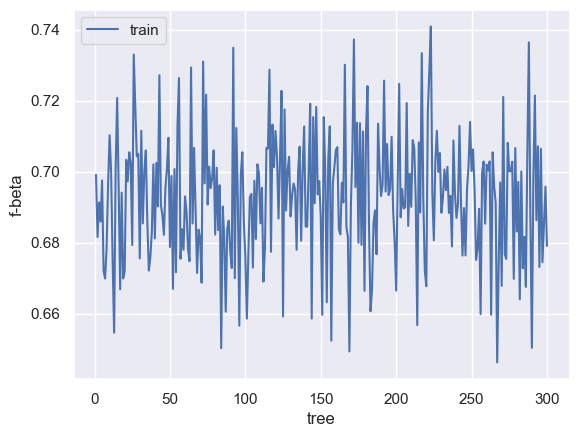

In [75]:
fig, ax = plt.subplots()
ax.plot(fbetas['tree'], fbetas['train'], label = 'train')

ax.legend()

ax.set_xlabel('tree')
ax.set_ylabel('f-beta')

Investigate tree depth for each tree

In [76]:
tree_depths = pd.DataFrame(
    {
        'tree' : range(0, len(clf_rf.estimators_)),
        'depth' : [estimator.get_depth() for estimator in clf_rf.estimators_]
    }
)

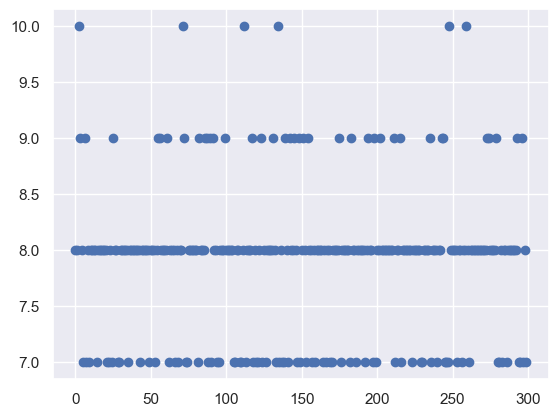

In [77]:
plt.scatter(x = tree_depths['tree'], y = tree_depths['depth'])

Allow trees to grow more by decreasing ccp_alpha

In [78]:
# explore lower values of ccp_alpha along with the optimal paramaters from grid search
param_grid = {
    'n_estimators' : [300],
    'max_depth': [None],
    'max_features' : [None],
    'ccp_alpha': [0, 0.0001, 0.001,],
}

In [79]:
# cross-validation
gs = GridSearchCV(
    clf_rf,
    param_grid,
    n_jobs = -1,
    cv = 5,
    scoring = make_scorer(fbeta_score, beta = 0.5)
)

gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(ccp_alpha=0.001,
                                              class_weight='balanced_subsample',
                                              max_features=None,
                                              n_estimators=300, n_jobs=-1,
                                              oob_score=<function f1_score at 0x0000016113D85120>,
                                              random_state=1),
             n_jobs=-1,
             param_grid={'ccp_alpha': [0, 0.0001, 0.001], 'max_depth': [None],
                         'max_features': [None], 'n_estimators': [300]},
             scoring=make_scorer(fbeta_score, response_method='predict', beta=0.5))

In [80]:
gs.best_params_

{'ccp_alpha': 0, 'max_depth': None, 'max_features': None, 'n_estimators': 300}

In [81]:
gs.best_score_

0.8663372706525546

In [82]:
# fit a RandomForestClassifier model with the best estimators obtained from the GridSearchCV
clf_rf = gs.best_estimator_

### Evaluation on Validation Data

In [83]:
# score of the RandomForestClassifier model with the tuned hyper-parameters
y_pred_rf = clf_rf.predict(X_validation)
print(classification_report(y_validation, y_pred_rf))

# fbeta
print(f'{fbeta_score(y_validation, y_pred_rf, beta=0.5):.2f}')

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      5249
           1       0.91      0.76      0.83      1500

    accuracy                           0.93      6749
   macro avg       0.92      0.87      0.89      6749
weighted avg       0.93      0.93      0.93      6749

0.87


Investigate the precision-recall curve.


In [84]:
# get precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_validation, clf_rf.predict_proba(X_validation)[:,1], drop_intermediate = True)

Text(0, 0.5, 'precision')

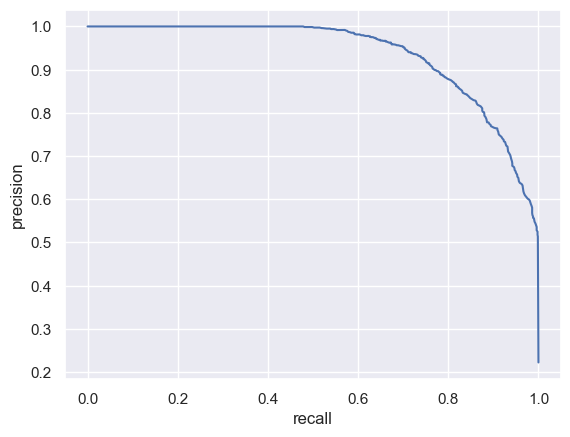

In [85]:
fig, ax = plt.subplots()
ax.plot(recall, precision)
ax.set_xlabel('recall')
ax.set_ylabel('precision')

Get the threshold which will maximize the f-beta(0.5) score.

In [86]:
fbetas = []
for threshold in thresholds:
    pred_probas = clf_rf.predict_proba(X_validation)[:,1]
    y_pred = [1 if pred_proba > threshold else 0 for pred_proba in pred_probas]
    fbetas.append(fbeta_score(y_validation, y_pred, beta = 0.5))

In [87]:
opt_threshold = thresholds[np.argmax(fbetas)]
print(f'Optimal threshold: {opt_threshold:.4f}')

Optimal threshold: 0.6433


In [88]:
# metrics with custom threshold
y_pred_rf = [1 if predict_proba > opt_threshold else 0 for predict_proba in clf_rf.predict_proba(X_validation)[:,1]]
print(classification_report(y_validation, y_pred_rf))

# fbeta
print(fbeta_score(y_validation, y_pred_rf, beta = 0.5))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      5249
           1       0.95      0.70      0.81      1500

    accuracy                           0.93      6749
   macro avg       0.94      0.84      0.88      6749
weighted avg       0.93      0.93      0.92      6749

0.8890964673913043


In [147]:
# update summary
summary = update_summary('Random Forest', y_pred_rf, summary)

display(pd.DataFrame(summary))

Models  Precision  Accuracy    Recall  F1 Score  \
0     Dummy Classifier   0.221562  0.499926  0.497333  0.306554   
1  Logistic Regression   0.643523  0.869018  0.920667  0.757543   
2        Random Forest   0.954421  0.925470  0.698000  0.806315   

   F-beta (beta=0.5)  
0           0.249198  
1           0.684748  
2           0.889096

## GradientBoosting

For the Gradient boosting model, we will use HistGradientBoostingClassifier since it is suggested for datasets with more than 10,000 samples for ease in computation.

In [148]:
X_train.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income',
       'cb_person_cred_hist_length', 'credit_score',
       'previous_loan_defaults_on_file', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'person_home_ownership_MORTGAGE',
       'loan_intent_DEBTCONSOLIDATION', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE'],
      dtype='object')

In [149]:
# create a HistGradientBoostingClassifier
clf_hgb = HistGradientBoostingClassifier(
    random_state = 1,
    validation_fraction = 0.1,
    scoring = make_scorer(fbeta_score, beta = 0.5),
    class_weight = 'balanced', # give more weight to the positive class, 1
    max_bins = 255,
    early_stopping = False
)

### Fitting

#### Cross-validation

Cross-validation of HistGradientBoostingClassifer

In [150]:
# tuning parameters
parameter_grid ={
    'max_iter' : [200, 300], # include higher iterations for lower learning rates
    'learning_rate' : [0.1, 0.3, 0.5],
    'l2_regularization' : [0.01, 0.1, 0.3], # start with higher values for more generalized patterns
    'max_depth' : [9, 13],
    'max_features' : [0.9, 0.8],
}

In [151]:
# cross-validation
gs = GridSearchCV(
    estimator = clf_hgb,
    param_grid = parameter_grid,
    n_jobs = -1,
    cv = 5,
    scoring = make_scorer(fbeta_score, beta = 0.5)
)
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=HistGradientBoostingClassifier(class_weight='balanced',
                                                      early_stopping=False,
                                                      random_state=1,
                                                      scoring=make_scorer(fbeta_score, response_method='predict', beta=0.5)),
             n_jobs=-1,
             param_grid={'l2_regularization': [0.01, 0.1, 0.3],
                         'learning_rate': [0.1, 0.3, 0.5], 'max_depth': [9, 13],
                         'max_features': [0.9, 0.8], 'max_iter': [200, 300]},
             scoring=make_scorer(fbeta_score, response_method='predict', beta=0.5))

In [152]:
# best estimator
gs.best_estimator_

HistGradientBoostingClassifier(class_weight='balanced', early_stopping=False,
                               l2_regularization=0.01, learning_rate=0.5,
                               max_depth=13, max_features=0.8, max_iter=300,
                               random_state=1,
                               scoring=make_scorer(fbeta_score, response_method='predict', beta=0.5))

In [153]:
gs.best_params_

{'l2_regularization': 0.01,
 'learning_rate': 0.5,
 'max_depth': 13,
 'max_features': 0.8,
 'max_iter': 300}

In [154]:
gs.best_score_

0.8409206505938173

Explore f-beta for each tree

In [155]:
clf_hgb = gs.best_estimator_

In [156]:
# create dataframe with the f-betas for train and validation
fbetas = pd.DataFrame(
    {
        'trees' : range(1, clf_hgb.n_iter_+1),
        'train' : [fbeta_score(y_train, y_pred, beta=0.5) for y_pred in clf_hgb.staged_predict(X_train)],
        'validation' : [fbeta_score(y_validation, y_pred, beta=0.5) for y_pred in clf_hgb.staged_predict(X_validation)]
    }
).set_index('trees')

In [157]:
# create a function that will plot the f-betas for each iteration
def plot_fbetas(fbetas):
    fig, ax = plt.subplots()
    ax.plot(fbetas.index, fbetas['train'], label = 'Train')
    ax.plot(fbetas.index, fbetas['validation'], label ='Validation')
    ax.legend()
    ax.set_xlabel('No. of trees')
    ax.set_ylabel('F-beta')

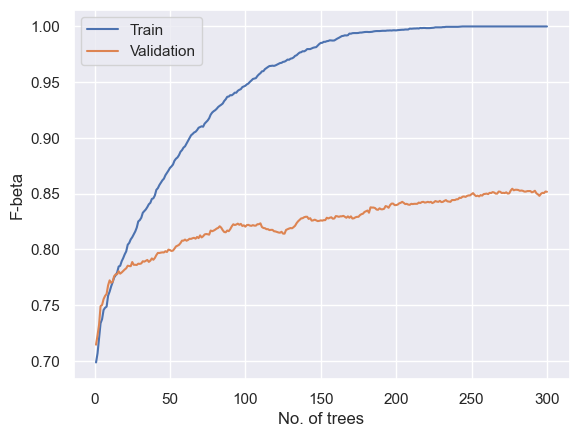

In [158]:
plot_fbetas(fbetas)

In [159]:
# prediction using the best estimator
y_pred_hgb = clf_hgb.predict(X_validation)

### Evaluation on Validation Data

In [160]:
# score
print(classification_report(y_validation, y_pred_hgb))

# fbeta
print(fbeta_score(y_validation, y_pred_hgb, beta = 0.5))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      5249
           1       0.86      0.84      0.85      1500

    accuracy                           0.93      6749
   macro avg       0.90      0.90      0.90      6749
weighted avg       0.93      0.93      0.93      6749

0.8516558089033659


investigate precision-recall curve

In [161]:
clf_hgb.predict_proba(X_validation)[:,1]

array([1.56904770e-08, 9.22456905e-01, 1.14256984e-08, ...,
       2.23953890e-08, 1.92414021e-09, 7.75483501e-01])

In [162]:
# get precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_validation, clf_hgb.predict_proba(X_validation)[:,1], drop_intermediate = True)

Text(0, 0.5, 'precision')

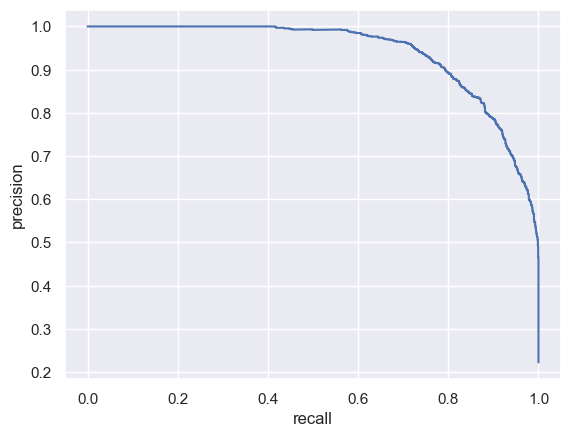

In [163]:
# plot precision-recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision)
ax.set_xlabel('recall')
ax.set_ylabel('precision')

Get the threshold which will maximize the f-beta(0.5) score.

In [164]:
fbetas = []
for threshold in thresholds:
    pred_probas = clf_hgb.predict_proba(X_validation)[:,1]
    y_pred = [1 if pred_proba > threshold else 0 for pred_proba in pred_probas]
    fbetas.append(fbeta_score(y_validation, y_pred, beta = 0.5))

In [165]:
opt_threshold = thresholds[np.argmax(fbetas)]
print(f'Optimal threshold: {opt_threshold:.4f}')

Optimal threshold: 0.9404


In [166]:
# metrics with custom threshold
y_pred_hgb = [1 if predict_proba > opt_threshold else 0 for predict_proba in clf_hgb.predict_proba(X_validation)[:,1]]
print(classification_report(y_validation, y_pred_hgb))

# fbeta
print(fbeta_score(y_validation, y_pred_hgb, beta = 0.5))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96      5249
           1       0.96      0.72      0.82      1500

    accuracy                           0.93      6749
   macro avg       0.94      0.85      0.89      6749
weighted avg       0.93      0.93      0.93      6749

0.8985943775100401


In [167]:
# update summary
summary = update_summary('Hist Gradient Boosting', y_pred_hgb, summary)

display(pd.DataFrame(summary))

Models  Precision  Accuracy    Recall  F1 Score  \
0        Dummy Classifier   0.221562  0.499926  0.497333  0.306554   
1     Logistic Regression   0.643523  0.869018  0.920667  0.757543   
2           Random Forest   0.954421  0.925470  0.698000  0.806315   
3  Hist Gradient Boosting   0.959786  0.930212  0.716000  0.820160   

   F-beta (beta=0.5)  
0           0.249198  
1           0.684748  
2           0.889096  
3           0.898594

## AdaBoost

### Fitting

#### Cross-Validation

In [168]:
# create an AdaBoostClassifier model
clf_ab = AdaBoostClassifier(random_state=1, algorithm='SAMME')

In [169]:
# tuning parameters
param_grid = {
    'estimator' : [DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=3),DecisionTreeClassifier(max_depth=5)],
    'n_estimators' : [100, 150, 250],
    'learning_rate' : [3, 1, 0.5],
}

In [170]:
# cross validation with GridSearchCV
gs = GridSearchCV(
    estimator = clf_ab,
    param_grid = param_grid,
    n_jobs = -1,
    cv = 5,
    scoring = make_scorer(fbeta_score, beta = 0.5)
)

gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(algorithm='SAMME', random_state=1),
             n_jobs=-1,
             param_grid={'estimator': [DecisionTreeClassifier(max_depth=1),
                                       DecisionTreeClassifier(max_depth=3),
                                       DecisionTreeClassifier(max_depth=5)],
                         'learning_rate': [3, 1, 0.5],
                         'n_estimators': [100, 150, 250]},
             scoring=make_scorer(fbeta_score, response_method='predict', beta=0.5))

In [171]:
# best estimator
gs.best_estimator_

AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(max_depth=5),
                   learning_rate=1, n_estimators=250, random_state=1)

In [172]:
gs.best_score_

0.8570040737193313

In [173]:
# best parameters
gs.best_params_

{'estimator': DecisionTreeClassifier(max_depth=5),
 'learning_rate': 1,
 'n_estimators': 250}

Investigate model performance

In [174]:
clf_ab = gs.best_estimator_

In [175]:
# create dataframe with the f-betas for train and validation
fbetas = pd.DataFrame(
    {
        'trees' : range(1, len(clf_ab.estimators_)+1),
        'train' : [fbeta_score(y_train, y_pred, beta=0.5) for y_pred in clf_ab.staged_predict(X_train)],
        'validation' : [fbeta_score(y_validation, y_pred, beta=0.5) for y_pred in clf_ab.staged_predict(X_validation)]
    }
).set_index('trees')

C:\Users\anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


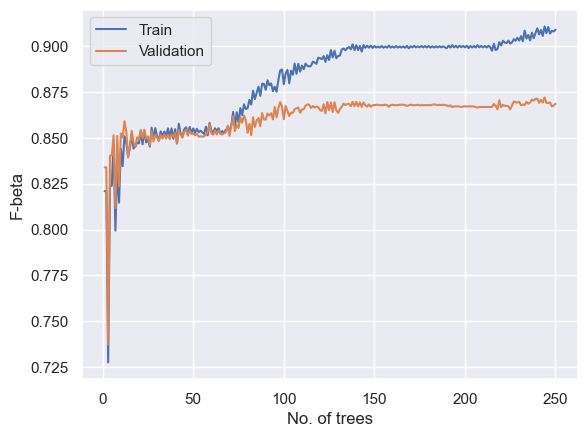

In [176]:
# plot
plot_fbetas(fbetas)

### Evaluation on Validation Data

In [177]:
# predict using the best estimator
y_pred_ab = clf_ab.predict(X_validation)

In [178]:
# score
print(classification_report(y_validation, y_pred_ab))

# fbeta
print(fbeta_score(y_validation, y_pred_ab, beta = 0.5))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      5249
           1       0.89      0.81      0.84      1500

    accuracy                           0.93      6749
   macro avg       0.92      0.89      0.90      6749
weighted avg       0.93      0.93      0.93      6749

0.8684738955823293


Investigate the precision-recall curve.


In [179]:
# get precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_validation, clf_ab.predict_proba(X_validation)[:,1], drop_intermediate = True)

Text(0, 0.5, 'precision')

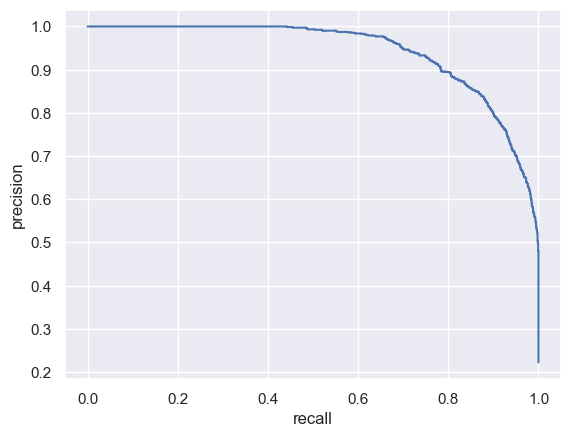

In [180]:
fig, ax = plt.subplots()
ax.plot(recall, precision)
ax.set_xlabel('recall')
ax.set_ylabel('precision')

Get the threshold which will maximize the f-beta(0.5) score.

In [181]:
fbetas = []
for threshold in thresholds:
    pred_probas = clf_ab.predict_proba(X_validation)[:,1]
    y_pred = [1 if pred_proba > threshold else 0 for pred_proba in pred_probas]
    fbetas.append(fbeta_score(y_validation, y_pred, beta = 0.5))

In [182]:
opt_threshold = thresholds[np.argmax(fbetas)]
print(f'Optimal threshold: {opt_threshold:.4f}')

Optimal threshold: 0.5241


In [183]:
# metrics with custom threshold
y_pred_ab = [1 if predict_proba > opt_threshold else 0 for predict_proba in clf_ab.predict_proba(X_validation)[:,1]]
print(classification_report(y_validation, y_pred_ab))

# fbeta
print(fbeta_score(y_validation, y_pred_ab, beta = 0.5))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      5249
           1       0.96      0.69      0.80      1500

    accuracy                           0.92      6749
   macro avg       0.94      0.84      0.88      6749
weighted avg       0.93      0.92      0.92      6749

0.8902815934065934


In [184]:
# update summary
summary = update_summary('Adaptive Boosting', y_pred_ab, summary)

display(pd.DataFrame(summary))

Models  Precision  Accuracy    Recall  F1 Score  \
0        Dummy Classifier   0.221562  0.499926  0.497333  0.306554   
1     Logistic Regression   0.643523  0.869018  0.920667  0.757543   
2           Random Forest   0.954421  0.925470  0.698000  0.806315   
3  Hist Gradient Boosting   0.959786  0.930212  0.716000  0.820160   
4       Adaptive Boosting   0.959297  0.924878  0.691333  0.803565   

   F-beta (beta=0.5)  
0           0.249198  
1           0.684748  
2           0.889096  
3           0.898594  
4           0.890282

## XGBoost

In [185]:
# import library and modules
try:
  import xgboost
except ImportError:
  !pip install xgboost
  import xgboost

from xgboost import XGBClassifier

print(f'XGBoost version: {xgboost.__version__}')

XGBoost version: 2.1.1


Compute the ratio of the negative instances to the positive instances which would be used as a value for the `scale_pos_weight` parameter.

### Fitting

In [186]:
# ratio of negative to positive instances
negative, positive = pd.Series(y_train).value_counts()
ratio_instances = negative/positive
print(f'ratio of negative to positive instances: {ratio_instances:.2f}')

ratio of negative to positive instances: 3.50


In [187]:
# wrap fbeta scorer in a function
def fbeta_eval(y_true, y_pred):
    y_pred_binary = (y_pred >= 0.5).astype(int)
    fbeta = fbeta_score(y_true, y_pred_binary, beta=0.5)  # calculate fbeta
    return fbeta

In [188]:
# create XGBClassifier instance
clf_xgb = XGBClassifier(
    objective = 'binary:logistic',
    tree_method = 'approx',
    grow_policy = 'lossguide',
    booster = 'gbtree',
    scale_pos_weight = ratio_instances, # recommended value
    eval_metric = fbeta_eval,
    n_jobs = None,
    random_state = 1
)

#### Cross-validation

In [189]:
# parameter grid
param_grid = {
    'n_estimators' : [100, 300, 500],
    'learning_rate' : [0.3, 0.5, 0.7],
    'gamma' : [1, 3],
    'subsample' : [1, 0.8],
    'reg_lambda' : [0.1, 1, 3], # only implements l2 regularization
    'colsample_bylevel' : [1, 0.8], # perform random feature selection on each level
}

Run a 5-fold cross-validation.

In [190]:
# create GridSearchCV instance
gs = GridSearchCV(
    estimator = clf_xgb,
    param_grid = param_grid,
    scoring = make_scorer(fbeta_score, beta = 0.5),
    n_jobs = 2,
    cv = 5
)

In [191]:
# fit
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster='gbtree',
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric=<function fbeta_eval at 0x00000161132C4400>,
                                     feature_types=None, gamma=None,
                                     grow_policy='lossguide',
                                     importance_type=None,
                                     i...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=1, ...),
             n_jobs=2,
             param_grid={'colsample_bylevel': [1, 0.8], 'gamma': [1, 3],
                         'learning_rate': [0.3, 0.5, 0.7],
                         'n_estimators': [100, 300, 500],
                         'reg_lambda': [0.1, 1, 3], 'subsample': [1, 0.8]},
             scoring=make_scorer(fbeta_score, response_method='predict', beta=0.5))

Based on the best parameter, define the new paramater grid for cross-validation

In [192]:
gs.best_params_

{'colsample_bylevel': 1,
 'gamma': 1,
 'learning_rate': 0.3,
 'n_estimators': 500,
 'reg_lambda': 1,
 'subsample': 0.8}

In [193]:
gs.best_score_

0.8272768176875076

In [194]:
clf_xgb = gs.best_estimator_

Define a custom callback to for early stopping that will maximize fbeta

In [195]:
early_stopping_callback = xgboost.callback.EarlyStopping(
    rounds = 50,
    save_best = True,
    maximize = True,
    data_name = "validation_0",
    metric_name = "fbeta_eval",
)

In [196]:
# create XGBClassiger instance with the optimal parameters, and with early stopping
clf_xgb = XGBClassifier(
    objective = 'binary:logistic',
    tree_method = 'approx',
    grow_policy = 'lossguide',
    booster = 'gbtree',
    scale_pos_weight = ratio_instances, # recommended value
    n_jobs = None,
    random_state = 1,
    eval_metric = fbeta_eval, # fbeta
    callbacks = [early_stopping_callback],
    **(gs.best_params_)
)

In [197]:
# fit the xgboost model with eval sets
clf_xgb.fit(
    X_train,
    y_train,
    eval_set = [(X_train, y_train), (X_validation, y_validation)]
)

[0]	validation_0-logloss:0.51804	validation_0-fbeta_eval:0.65239	validation_1-logloss:0.51386	validation_1-fbeta_eval:0.66848
[1]	validation_0-logloss:0.42092	validation_0-fbeta_eval:0.71321	validation_1-logloss:0.41526	validation_1-fbeta_eval:0.72693
[2]	validation_0-logloss:0.35906	validation_0-fbeta_eval:0.71995	validation_1-logloss:0.35249	validation_1-fbeta_eval:0.73296
[3]	validation_0-logloss:0.31796	validation_0-fbeta_eval:0.72271	validation_1-logloss:0.31011	validation_1-fbeta_eval:0.73658
[4]	validation_0-logloss:0.29016	validation_0-fbeta_eval:0.71890	validation_1-logloss:0.28191	validation_1-fbeta_eval:0.73354
[5]	validation_0-logloss:0.27078	validation_0-fbeta_eval:0.71164	validation_1-logloss:0.26231	validation_1-fbeta_eval:0.72603
[6]	validation_0-logloss:0.25532	validation_0-fbeta_eval:0.71107	validation_1-logloss:0.24666	validation_1-fbeta_eval:0.72634
[7]	validation_0-logloss:0.24306	validation_0-fbeta_eval:0.71514	validation_1-logloss:0.23440	validation_1-fbeta_eval:

XGBClassifier(base_score=None, booster='gbtree',
              callbacks=[<xgboost.callback.EarlyStopping object at 0x00000161103E03D0>],
              colsample_bylevel=1, colsample_bynode=None, colsample_bytree=None,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=<function fbeta_eval at 0x00000161132C4400>,
              feature_types=None, gamma=1, grow_policy='lossguide',
              importance_type=None, interaction_constraints=None,
              learning_rate=0.3, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

Investigate model performance

In [198]:
clf_xgb.best_iteration

414

In [199]:
# create dataframe with the f-betas for train and validation
fbetas = pd.DataFrame(
    {
        'boosters' : range(0, clf_xgb.best_iteration+50+1), # 50 early stopping rounds
        'train' : clf_xgb.evals_result()['validation_0']['fbeta_eval'],
        'validation' : clf_xgb.evals_result()['validation_1']['fbeta_eval']
    }
).set_index('boosters')

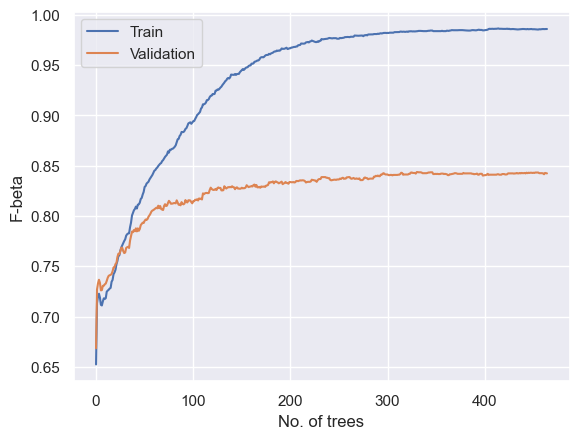

In [200]:
# plot
plot_fbetas(fbetas)

### Evaluation on Validation Data

Investigate classification report using the validation set

In [201]:
# predict using the validation set
y_pred_xgb = clf_xgb.predict(X_validation)

# classification report
print(classification_report(y_validation, y_pred_xgb))
print(fbeta_score(y_validation, y_pred_xgb, beta = 0.5))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      5249
           1       0.83      0.87      0.85      1500

    accuracy                           0.93      6749
   macro avg       0.90      0.91      0.90      6749
weighted avg       0.93      0.93      0.93      6749

0.8414948453608248


Investigate the precision-recall curve.


In [202]:
# get precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_validation, clf_xgb.predict_proba(X_validation)[:,1], drop_intermediate = True)

Text(0, 0.5, 'precision')

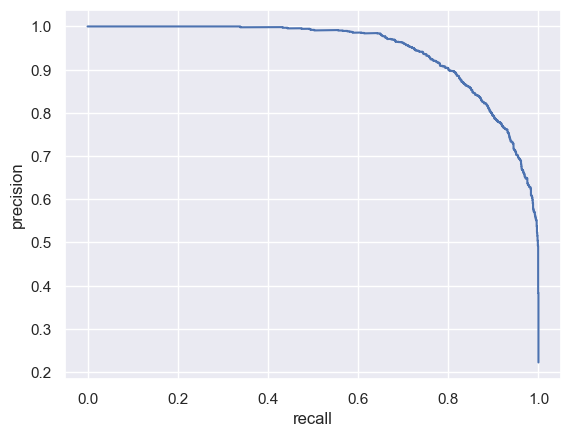

In [203]:
fig, ax = plt.subplots()
ax.plot(recall, precision)
ax.set_xlabel('recall')
ax.set_ylabel('precision')

Get the threshold which will maximize the f-beta(0.5) score.

In [204]:
fbetas = []
for threshold in thresholds:
    pred_probas = clf_xgb.predict_proba(X_validation)[:,1]
    y_pred = [1 if pred_proba > threshold else 0 for pred_proba in pred_probas]
    fbetas.append(fbeta_score(y_validation, y_pred, beta = 0.5))

In [205]:
opt_threshold = thresholds[np.argmax(fbetas)]
print(f'Optimal threshold: {opt_threshold:.4f}')

Optimal threshold: 0.9126


In [206]:
# metrics with custom threshold
y_pred_xgb = [1 if predict_proba > opt_threshold else 0 for predict_proba in clf_xgb.predict_proba(X_validation)[:,1]]
print(classification_report(y_validation, y_pred_xgb))

# fbeta
print(fbeta_score(y_validation, y_pred_xgb, beta = 0.5))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      5249
           1       0.96      0.70      0.81      1500

    accuracy                           0.93      6749
   macro avg       0.94      0.85      0.88      6749
weighted avg       0.93      0.93      0.92      6749

0.8954203691045797


In [207]:
# update summary
summary = update_summary('XGBoost', y_pred_xgb, summary)

display(pd.DataFrame(summary))

Models  Precision  Accuracy    Recall  F1 Score  \
0        Dummy Classifier   0.221562  0.499926  0.497333  0.306554   
1     Logistic Regression   0.643523  0.869018  0.920667  0.757543   
2           Random Forest   0.954421  0.925470  0.698000  0.806315   
3  Hist Gradient Boosting   0.959786  0.930212  0.716000  0.820160   
4       Adaptive Boosting   0.959297  0.924878  0.691333  0.803565   
5                 XGBoost   0.963235  0.927100  0.698667  0.809892   

   F-beta (beta=0.5)  
0           0.249198  
1           0.684748  
2           0.889096  
3           0.898594  
4           0.890282  
5           0.895420

## Feature Importances

In [208]:
# features
features = clf_logistic.feature_names_in_

Coefficients for logistic regression

In [209]:
# linear model coefficients
coefs = pd.Series(clf_logistic.coef_[0], index=features)

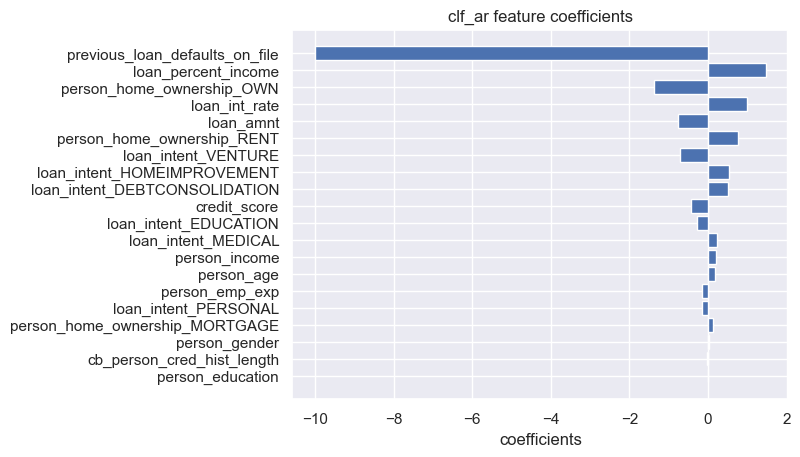

In [210]:
# sorting index
idx_sort = np.argsort(np.abs(coefs))

# plot
plt.barh(y=[coefs.keys().to_list()[i] for i in idx_sort],width=coefs.iloc[idx_sort]);
plt.title('clf_ar feature coefficients');
plt.xlabel('coefficients');
plt.show();

Feature Importances

In [211]:
classification_models = [clf_rf,clf_ab,clf_xgb]
model_names = ['clf_rf','clf_ab','clf_xgb']

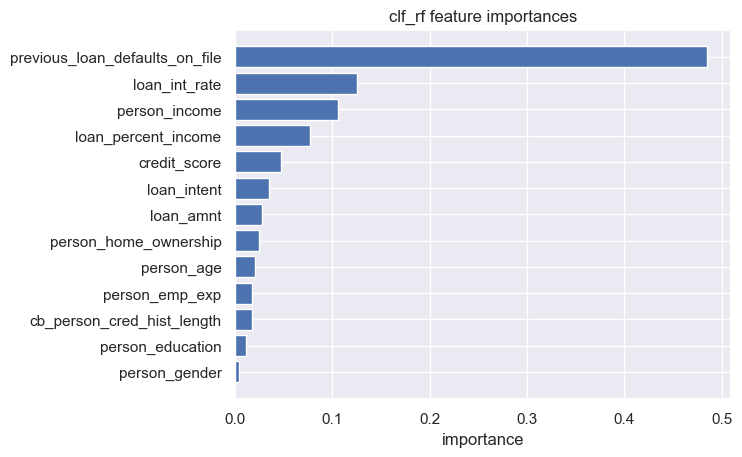

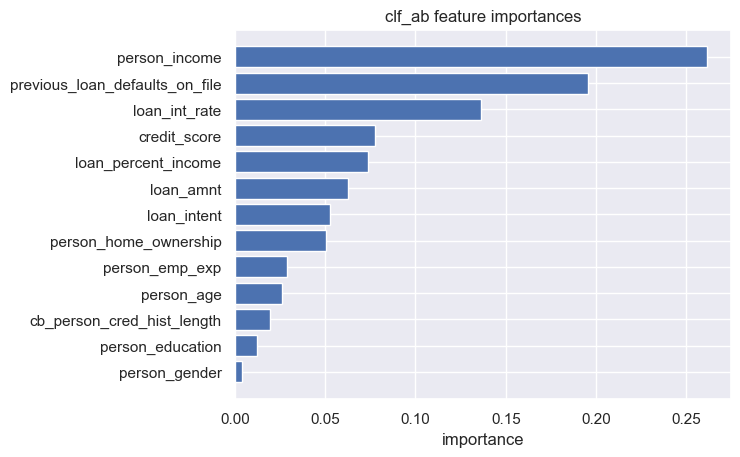

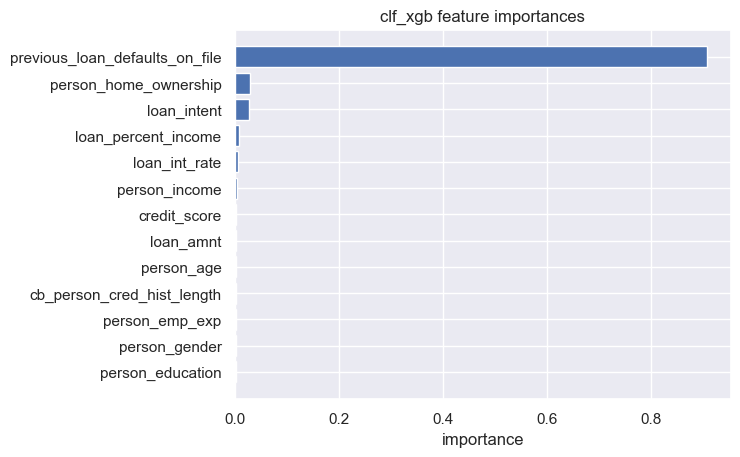

In [212]:
# feature importances
for model, model_name in zip(classification_models,model_names):
    imp = pd.Series(model.feature_importances_, index=model.feature_names_in_)
    # merge features
    features = model.feature_names_in_
    for feature in categorical_features:
        # boolean index to match each categorical feature in the new features
        idx = [(feature in i) for i in imp.keys().to_list()]
        # summed mean of importances
        imp_sum = imp[idx].sum()
        imp = imp[np.logical_not(idx)]
        if np.any([(feature in i) for i in features]):
            imp[feature] = imp_sum

    # sorting index
    idx_sort = np.argsort(imp)

    # plot
    plt.barh(y=[imp.keys().to_list()[i] for i in idx_sort],width=imp.iloc[idx_sort]);
    plt.title(f'{model_name} feature importances');
    plt.xlabel('importance');
    plt.show();

Permutation importances for HistGradientBoostingClassifier

In [213]:
# Permutation importance
result = permutation_importance(clf_hgb, X_validation, y_validation, n_repeats=5, n_jobs=-1, random_state=1)
hgb_importances = pd.Series(result.importances_mean, index=clf_hgb.feature_names_in_)
hgb_std = pd.Series(result.importances_std, index=clf_hgb.feature_names_in_)

In [214]:
features= clf_hgb.feature_names_in_

In [215]:
# sum the importances for the renamed features
for feature in categorical_features:
    idx = [(feature in i) for i in hgb_importances.keys().tolist()]

    importances_sum = hgb_importances[idx].sum()
    hgb_importances = hgb_importances[np.logical_not(idx)]
    hgb_importances[feature] = importances_sum
    if np.any([(feature in i) for i in features]):
        imp[feature] = imp_sum

    importances_std = np.sqrt((hgb_std[idx]**2).sum())
    hgb_std = hgb_std[np.logical_not(idx)]
    hgb_std[feature] = importances_std

In [216]:
# sorting index based on feature importance
idx_sort = np.argsort(hgb_importances)

Plot of feature importances for the HistGradientBoostingClassifier

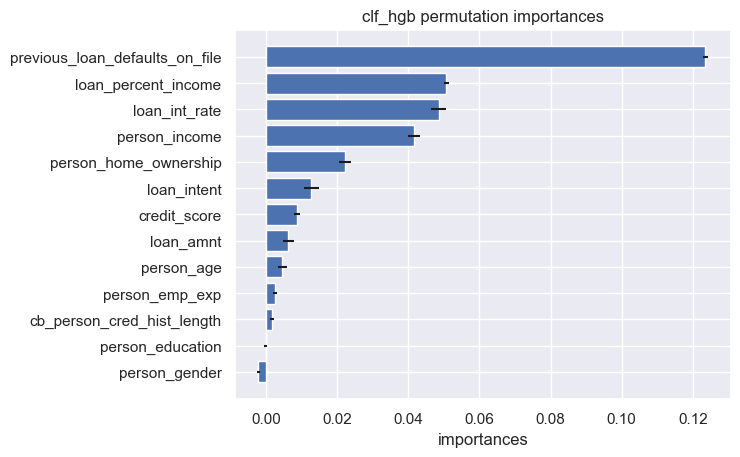

In [217]:
# plot of feature importances
fig, ax = plt.subplots()
ax.barh(y=[hgb_importances.keys().tolist()[i] for i in idx_sort], width=hgb_importances.iloc[idx_sort], xerr=hgb_std.iloc[idx_sort])
ax.set_xlabel('importances');
ax.set_title('clf_hgb permutation importances');
plt.show();

# Summary

Summary of models

In [218]:
display(pd.DataFrame(summary))

Models  Precision  Accuracy    Recall  F1 Score  \
0        Dummy Classifier   0.221562  0.499926  0.497333  0.306554   
1     Logistic Regression   0.643523  0.869018  0.920667  0.757543   
2           Random Forest   0.954421  0.925470  0.698000  0.806315   
3  Hist Gradient Boosting   0.959786  0.930212  0.716000  0.820160   
4       Adaptive Boosting   0.959297  0.924878  0.691333  0.803565   
5                 XGBoost   0.963235  0.927100  0.698667  0.809892   

   F-beta (beta=0.5)  
0           0.249198  
1           0.684748  
2           0.889096  
3           0.898594  
4           0.890282  
5           0.895420

# Training with Neural Network

In [51]:
# import libraries and modules
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data

print(f'Torch version: {torch.__version__}')

Torch version: 2.5.1+cu124


In [52]:
# import ray tune for hyperparameter tuning
try:
  import ray
except ImportError:
  !pip install ray
  import ray

from ray import tune, train
from ray.train import Checkpoint
from ray.air import RunConfig
from ray.tune.schedulers import ASHAScheduler

print(f'Ray version: {ray.__version__}')

Ray version: 2.42.0


In [53]:
# import other helper libraries
import os
import joblib
import tempfile
try:
  import dill
except ImportError:
  !pip install dill
  import dill

print(f'Joblib version: {joblib.__version__}')
print(f'Dill version: {dill.__version__}')

Joblib version: 1.4.2
Dill version: 0.3.9


## Data Loading as Tensors

In [54]:
# assign device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [55]:
# def load_data function that will load the datasets as tensors
def load_data(X_train, X_validation, X_test, y_train, y_validation, y_test, device):

  # convert dataframes and numpy arrays to tensors
  X_train = torch.tensor(X_train.values, dtype=torch.float32, device=device)
  X_validation = torch.tensor(X_validation.values, dtype=torch.float32, device=device)
  X_test = torch.tensor(X_test.values, dtype=torch.float32, device=device)
  y_train = torch.tensor(y_train, dtype=torch.float32, device=device)
  y_validation = torch.tensor(y_validation, dtype=torch.float32, device=device)
  y_test = torch.tensor(y_test, dtype=torch.float32, device=device)

  # create tensor datasets
  train_dataset = data.TensorDataset(X_train, y_train)
  validation_dataset = data.TensorDataset(X_validation, y_validation)
  test_dataset = data.TensorDataset(X_test, y_test)

  return train_dataset, validation_dataset, test_dataset


In [56]:
# load datasets
train_dataset, validation_dataset, test_dataset = load_data(X_train, X_validation, X_test, y_train, y_validation, y_test, device)

## Defining the Neural Network

In [57]:
# input size (features)
input_size = X_train.shape[-1]
print(input_size)

20


In [58]:
# categorical features
X_train.columns.to_list()

['person_age',
 'person_gender',
 'person_education',
 'person_income',
 'person_emp_exp',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length',
 'credit_score',
 'previous_loan_defaults_on_file',
 'person_home_ownership_OWN',
 'person_home_ownership_RENT',
 'person_home_ownership_MORTGAGE',
 'loan_intent_DEBTCONSOLIDATION',
 'loan_intent_EDUCATION',
 'loan_intent_HOMEIMPROVEMENT',
 'loan_intent_MEDICAL',
 'loan_intent_PERSONAL',
 'loan_intent_VENTURE']

In [59]:
# define the neural network architecture

class ClassificationNet(nn.Module):
    def __init__(self, input_size = 20, l0=8, l1=16, l2=32, dropout_rate=0.2):
      super().__init__()

      # input branches for grouped features (One-hot-encoded)
      self.home_ownership_branch = nn.Sequential(
          nn.Linear(3, l0//4),
          nn.ReLU()
          )
      self.loan_intent_branch = nn.Sequential(
          nn.Linear(6, l0//4),
          nn.ReLU()
          )

      # other features
      self.other_features = nn.Sequential(
          nn.Linear(20-3-6, l0//2),
          nn.ReLU()
          )

      self.bn0 = nn.BatchNorm1d(2*(l0//4)+(l0//2), dtype=torch.float32) # first normalization layer
      self.dropout0 = nn.Dropout(p=dropout_rate) # first dropout layer

      self.fc1 = nn.Linear(l0, l1) # first fully connected layer
      self.bn1 = nn.BatchNorm1d(l1, dtype=torch.float32)
      self.dropout1 = nn.Dropout(p=dropout_rate)

      self.fc2 = nn.Linear(l1, l2) # second fully connected layer

      self.fc3 = nn.Linear(l2, 1) #final fully connected layer; 1 output corresponding to loan approval
      self.sigmoid = nn.Sigmoid() # layer converting the output to a probability

    def forward(self, x):
      # split features into groups
      home_ownership_inputs = x[:,11:14]
      loan_intent_inputs = x[:, 14:20]
      other_inputs = x[:,:11]

      # processing each group
      home_ownership_outputs = self.home_ownership_branch(home_ownership_inputs)
      loan_intent_outputs = self.loan_intent_branch(loan_intent_inputs)
      other_outputs = self.other_features(other_inputs)

      # concatenate ouputs
      x = self.bn0(torch.cat([home_ownership_outputs, loan_intent_outputs, other_outputs], dim=1))
      x = self.dropout0(x)

      x = self.bn1(F.relu(self.fc1(x))) # first fully connected layer
      x = self.dropout1(x)

      x = F.relu(self.fc2(x)) # second fully connected layer

      x = self.fc3(x) # output layer
      x = self.sigmoid(x) # conversion of output layer to a probability
      return x

## Train Function

In [60]:
# define a train function
def train_func(model, optimizer, train_loader, device, epoch):
  model.train()

  # initialize values
  running_loss = 0
  train_loss = 0
  precision = 0
  total_accuracy = 0
  batch_data_points = 0
  total_data_points = 0
  all_labels = []
  all_predictions = []

  # iterate through batches
  for batch_idx, data in enumerate(train_loader):
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)

    # reset gradient to 0
    optimizer.zero_grad()

    # criterion
    criterion = nn.BCELoss()

    # forward
    prediction_probas = model(inputs).squeeze(1)
    predictions = torch.where(prediction_probas >= 0.5, 1., 0.) # convert the probability to class prediction

    # accumulate all labels and predictions
    all_predictions.extend(predictions.cpu().numpy())
    all_labels.extend(labels.cpu().numpy())

    # loss
    loss = criterion(prediction_probas, labels)

    # backward
    loss.backward()

    # optimize
    optimizer.step()

    # monitor running loss (for the mini-batch)
    running_loss += loss.item() * len(inputs)

    # monitor data points for the batch
    batch_data_points += len(inputs)

    # monitor total_data points
    total_data_points += len(inputs)

    # output statistics every quarter of total batches
    if (batch_idx+1) in [len(train_loader)//i for i in range(1,5)]:
      print(f'[{epoch+1}, {batch_idx+1}] loss: {running_loss/batch_data_points:.4f}')

      # reset monitoring values
      running_loss = 0
      batch_data_points = 0

    # monitor total train_loss
    train_loss += loss * len(inputs)

    # average loss
    average_loss = train_loss / total_data_points

  # precision
  precision = precision_score(all_labels,all_predictions)

  return precision

## Test Function

In [61]:
# define a test function
def test_func(model, test_loader, device):
  model.eval()

  # initialize values
  all_predictions = []
  all_labels = []
  precision = 0

  # iterate through batches
  for batch_idx, data in enumerate(test_loader):
    with torch.no_grad():
      inputs, labels = data
      inputs, labels = inputs.to(device), labels.to(device)

      # predictions
      prediction_probas = model(inputs).squeeze(1)
      predictions = torch.where(prediction_probas >= 0.5, 1., 0.) # convert the probability to class prediction

      # accumulate labels and predictions
      all_predictions.extend(predictions.cpu().numpy())
      all_labels.extend(labels.cpu().numpy())

  # precision
  precision = precision_score(all_labels, all_predictions)

  # classification report
  report = classification_report(all_labels, all_predictions, output_dict=True)

  return precision, report

## Train Loop

In [62]:
# define training loop
def train_loanapproval(config, train_dataset, validation_dataset, epoch_start=0, epoch_end=5):
  # device
  device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

  # dataloaders
  train_loader = data.DataLoader(train_dataset, batch_size=config['batch_size'], num_workers=2)
  validation_loader = data.DataLoader(validation_dataset, batch_size=config['batch_size'], num_workers=2)

  # define model
  model = ClassificationNet(input_size=20, l0=config['l0'], l1=config['l1'], l2=config['l2'], dropout_rate=config['dropout_rate'])
  model.to(device)

  # define optimizer
  optimizer = torch.optim.Adam(params=model.parameters(), lr=config['lr'])

  # train loop
  for epoch in range(epoch_start, epoch_end):
    train_precision = train_func(model=model, optimizer=optimizer, train_loader=train_loader, device=device, epoch=epoch)
    # evaluation on validation set
    validation_precision,_ = test_func(model=model, test_loader=validation_loader, device=device)

    # create checkpoint
    with tempfile.TemporaryDirectory() as temp_checkpoint_dir:
      checkpoint = None

      # save current state_dict (checkpoint)
      torch.save({
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict()
        }, os.path.join(temp_checkpoint_dir, 'checkpoint.pth'))

      # load checkpoint from saved file
      checkpoint = Checkpoint.from_directory(temp_checkpoint_dir)

      # report to ray tune the precision with the associated checkpoint after each epoch
      train.report({'precision':validation_precision}, checkpoint=checkpoint)

  print('Finished Training')

## Hyperparameter Tuning

In [63]:
# define tuner_func

def tuner_func(search_space, num_samples, epoch_end):
  tuner = tune.Tuner(
      trainable = tune.with_parameters(train_loanapproval, train_dataset=train_dataset, validation_dataset=validation_dataset, epoch_end=epoch_end),
      param_space = search_space,
      tune_config = tune.TuneConfig(num_samples=num_samples, mode='max', metric='precision')
  )

  # execute hyperparameter tuning
  results = tuner.fit()

  return results

In [64]:
%%capture
# defining the search space
search_space = {
    'l0' : tune.choice([2**i for i in range(3,9)]),
    'l1' : tune.choice([2**i for i in range(3,9)]),
    'l2' : tune.choice([2**i for i in range(3,9)]),
    'batch_size': tune.choice([2**i for i in range(4,7)]),
    'lr' : tune.loguniform(1e-4,1e-2),
    'dropout_rate': tune.choice(np.arange(0.1,0.6,0.1))
}

# run tuner
results = tuner_func(search_space=search_space, num_samples=10, epoch_end=10)

2025-02-06 17:43:09,203	INFO worker.py:1841 -- Started a local Ray instance.
2025-02-06 17:43:11,796	INFO tune.py:253 -- Initializing Ray automatically. For cluster usage or custom Ray initialization, call `ray.init(...)` before `Tuner(...)`.
2025-02-06 17:43:11,955	INFO tensorboardx.py:193 -- pip install "ray[tune]" to see TensorBoard files.
2025-02-06 17:43:11,964	WARNING callback.py:136 -- The TensorboardX logger cannot be instantiated because either TensorboardX or one of it's dependencies is not installed. Please make sure you have the latest version of TensorboardX installed: `pip install -U tensorboardx`
2025-02-06 18:01:17,724	INFO tune.py:1009 -- Wrote the latest version of all result files and experiment state to '/root/ray_results/train_loanapproval_2025-02-06_17-43-03' in 0.0117s.


## Model Training with Best Configuration

In [65]:
# get best config
best_result = results.get_best_result()
best_config = best_result.config
best_checkpoint = best_result.checkpoint

print(best_config)

{'l0': 64, 'l1': 64, 'l2': 128, 'batch_size': 32, 'lr': 0.003759310863369194, 'dropout_rate': 0.2}


In [66]:
# training loop continuation
def train_loanapproval_best(config, best_checkpoint, train_dataset, validation_dataset, patience, epoch_start=0, epoch_end=5):
  # device
  device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

  # dataloaders
  train_loader = data.DataLoader(train_dataset, batch_size=config['batch_size'], num_workers=2)
  validation_loader = data.DataLoader(validation_dataset, batch_size=config['batch_size'], num_workers=2)

  # define model with best config
  model = ClassificationNet(input_size=20, l0=best_config['l0'], l1=best_config['l1'], l2=best_config['l2'], dropout_rate=best_config['dropout_rate'])

  # define optimizer with best config
  optimizer = torch.optim.Adam(params=model.parameters(), lr=config['lr'])

  # load checkpoint
  with best_checkpoint.as_directory() as best_checkpoint_dir:
    best_checkpoint = torch.load(os.path.join(best_checkpoint_dir, 'checkpoint.pth'))

    # load model and optimizer state_dict
    model.load_state_dict(best_checkpoint['model_state_dict'])
    optimizer.load_state_dict(best_checkpoint['optimizer_state_dict'])

  model.to(device)

  # define optimizer
  optimizer = torch.optim.Adam(params=model.parameters(), lr=config['lr'])

  # initialize values
  history = {
      'epoch': [],
      'train_precision' : [],
      'validation_precision': []
  }
  best_precision = float(0) # for early stopping
  counter = 0
  patience = patience # number of epochs to wait for no improvement

  # train loop
  for epoch in range(epoch_start,epoch_end+1):
    train_precision = train_func(model=model, optimizer=optimizer, train_loader=train_loader, device=device, epoch=epoch)
    # evaluation on test set
    validation_precision,_ = test_func(model=model, test_loader=validation_loader, device=device)

    history['epoch'].append(epoch)
    history['train_precision'].append(train_precision)
    history['validation_precision'].append(validation_precision)

    # check for improvement
    if validation_precision > best_precision:
      best_precision = validation_precision
      counter = 0 # reset counter if validation score improves
    else:
      counter += 1 # count the number of epochs that the precision is not improving

    # early stopping
    if counter >= patience:
      print(f'Early stopping at epoch {epoch+1}')

      # save model for future training
      path = './best_model.pth'
      torch.save(model.state_dict(), path)

      break # exit loop


  print('Finished Training')

  # save model for future training
  path = './best_model.pth'
  torch.save(model.state_dict(), path)

  return validation_precision, history

In [67]:
%%capture
# run the training loop
validation_precision, history = train_loanapproval_best(
    config=best_config,
    best_checkpoint=best_checkpoint,
    train_dataset=train_dataset,
    validation_dataset=validation_dataset,
    patience=8,
    epoch_start=10,
    epoch_end=49,
    )

# best validation precision
best_validation = max(history['validation_precision'])

### Plotting Metrics

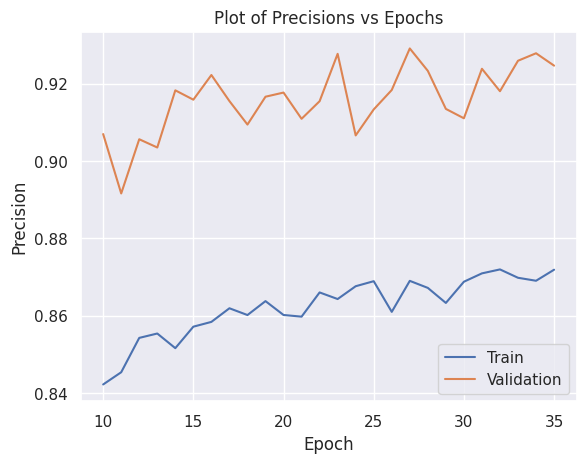

In [68]:
# plotting
sns.set_theme()
fig, ax1 = plt.subplots()

# plot epoch vs train precision
ax1.plot(history['epoch'], history['train_precision'], label='Train')

# superimpose epoch vs validation precision
ax1.plot(history['epoch'], history['validation_precision'], label='Validation')

# legend
ax1.legend()

# title
ax1.set_title('Plot of Precisions vs Epochs')

# labels
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Precision')

plt.show()

## Evaluation on the Test Data

In [69]:
# define model with best config
model = ClassificationNet(input_size=20, l0=best_config['l0'], l1=best_config['l1'], l2=best_config['l2'], dropout_rate=best_config['dropout_rate'])

# load model
path = './best_model.pth'
model.load_state_dict(torch.load(path, weights_only=True))

# load test data
test_loader = data.DataLoader(test_dataset, batch_size=best_config['batch_size'], num_workers=2)

# evaluate on test data using test_func
test_precision, report = test_func(model=model, test_loader=test_loader, device=torch.device('cuda' if torch.cuda.is_available() else 'cpu'))

print(f'Precision on Test Data: {test_precision:.4f}')
print(report) # print classification report

Precision on Test Data: 0.9070
{'0.0': {'precision': 0.9183782818360422, 'recall': 0.9796151647932939, 'f1-score': 0.9480088495575221, 'support': 5249.0}, '1.0': {'precision': 0.9069565217391304, 'recall': 0.6953333333333334, 'f1-score': 0.7871698113207547, 'support': 1500.0}, 'accuracy': 0.9164320640094828, 'macro avg': {'precision': 0.9126674017875863, 'recall': 0.8374742490633136, 'f1-score': 0.8675893304391384, 'support': 6749.0}, 'weighted avg': {'precision': 0.915839736844878, 'recall': 0.9164320640094828, 'f1-score': 0.9122615451635154, 'support': 6749.0}}


In [70]:
# store metrics
summary = {
    'Model' : [],
    'Recall' : [],
    'Precision' : [],
    'F1-score' : []
}
summary['Model'].append('Neural Network')
summary['Precision'].append(test_precision)
summary['Recall'].append(report['1.0']['recall'])
summary['F1-score'].append(report['1.0']['f1-score'])

# Training with TabNet

In [71]:
try:
  from pytorch_tabnet.tab_model import TabNetClassifier
  from pytorch_tabnet.metrics import Metric
except ImportError:
  !pip install pytorch-tabnet
  from pytorch_tabnet.tab_model import TabNetClassifier
  from pytorch_tabnet.metrics import Metric


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 75.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 66.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 48.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

## Hyperparameter Tuning

In [72]:
def train_loanapproval_tabnet(config, train_sets, val_sets, test_sets):
  # load data
  X_train, y_train = train_sets
  X_validation, y_validation = val_sets
  X_test, y_test = test_sets

  # create a TabNetClassifier instance
  clf_tabnet = TabNetClassifier(
      n_d = config['n_d'],
      n_a = config['n_d'], # suggested same value with n_d
      n_steps = config['n_steps'],
      gamma = config['gamma'],
      n_independent = config['n_independent'],
      n_shared = config['n_shared'],
      seed = 1,
      momentum = config['momentum'],
      optimizer_fn = torch.optim.Adam,
      scheduler_fn=torch.optim.lr_scheduler.StepLR,  # Learning rate scheduler (default: StepLR)
      scheduler_params=dict(step_size=50, gamma=0.9)
  )
  # define a custom precision matrix
  class custom_precision(Metric):
    def __init__(self):
      self._name = "precision"  # Name of the metric
      self._maximize = True  # Whether to maximize or minimize the metric (precision)

    def __call__(self, y_true, y_score):
      y_pred = np.argmax(y_score, axis=1)  # Get predicted labels since
      return precision_score(y_true, y_pred) # return precision

  # fit
  clf_tabnet.fit(
      X_train = X_train.values,
      y_train = y_train,
      eval_set = [(X_validation.values, y_validation)],
      eval_name = ['validation'],
      eval_metric = ['precision'],
      max_epochs = 20, # run hypertuning with a low epoch number
      patience = 20,
      weights = 1, # for imbalanced data
      batch_size = 1024,
      virtual_batch_size = 128,
      num_workers = 2
  )

  # access best precision
  best_precision = max(clf_tabnet.history['validation_precision']) # return the best precision from the history of validation_precision

  # report to ray train
  train.report({'validation_precision':best_precision})

  print('Finished Training')

In [73]:
# define tabnet_tuner_func

def tabnet_tuner_func(search_space, num_samples):
  tuner = tune.Tuner(
      trainable = tune.with_parameters(train_loanapproval_tabnet, train_sets=(X_train,y_train), val_sets=(X_validation, y_validation), test_sets=(X_test,y_test)),
      param_space = search_space,
      tune_config = tune.TuneConfig(num_samples=num_samples, mode='max', metric='validation_precision')
  )

  # execute hyperparameter tuning
  results = tuner.fit()

  return results

### Search Space

In [74]:
# search space
search_space = {
    'n_d' : tune.choice([8, 16, 32]),
    'n_steps' : tune.choice([i for i in range(3,11)]),
    'gamma': tune.choice(np.arange(1.,2.1,0.1)),
    'n_independent' : tune.choice(np.arange(1,6)),
    'n_shared' : tune.choice(np.arange(1,6)),
    'momentum' : tune.choice([0.01,0.1,0.4]),
}

### Tuning

In [75]:
%%capture
results = tabnet_tuner_func(search_space=search_space, num_samples=10)

2025-02-06 18:07:31,171	WARNING callback.py:136 -- The TensorboardX logger cannot be instantiated because either TensorboardX or one of it's dependencies is not installed. Please make sure you have the latest version of TensorboardX installed: `pip install -U tensorboardx`
2025-02-06 18:29:32,217	INFO tune.py:1009 -- Wrote the latest version of all result files and experiment state to '/root/ray_results/train_loanapproval_tabnet_2025-02-06_18-07-31' in 0.0118s.


In [76]:
best_results = results.get_best_result()
best_config = best_results.config

## Model Training with Best Configuration

In [77]:
best_config

{'n_d': 32,
 'n_steps': 3,
 'gamma': 1.1,
 'n_independent': 4,
 'n_shared': 4,
 'momentum': 0.1}

In [78]:
%%capture
clf_tabnet = TabNetClassifier(
    **best_config,
      seed = 1,
      optimizer_fn = torch.optim.Adam,
      scheduler_fn=torch.optim.lr_scheduler.StepLR,
      scheduler_params=dict(step_size=50, gamma=0.9)
  )

# define a custom precision matrix
class custom_precision(Metric):
  def __init__(self):
    self._name = "precision"  # Name of the metric
    self._maximize = True  # Whether to maximize or minimize the metric (precision)

  def __call__(self, y_true, y_score):
    y_pred = np.argmax(y_score, axis=1)
    return precision_score(y_true, y_pred) # return precision

clf_tabnet.fit(
    X_train = X_train.values,
    y_train = y_train,
    eval_set = [(X_validation.values, y_validation)],
    eval_name = ['validation'],
    eval_metric = ['precision'],
    max_epochs = 200,
    patience = 50,
    weights = 1, # for imbalanced data
    batch_size = 1024,
    virtual_batch_size = 128,
    num_workers = 2
)

## Evaluation on Test Data

In [79]:
# prediction on test data
y_pred_test = clf_tabnet.predict(X_test.values)

# model evaluation
precision = precision_score(y_test, y_pred_test)
print(f"precision: {precision:.4f}")
report_tabnet = classification_report(y_test, y_pred_test, output_dict=True)
print(report_tabnet)

precision: 0.7048
{'0': {'precision': 0.9664056059356966, 'recall': 0.8933130120022862, 'f1-score': 0.9284229284229284, 'support': 5249.0}, '1': {'precision': 0.7047970479704797, 'recall': 0.8913333333333333, 'f1-score': 0.787165145716809, 'support': 1500.0}, 'accuracy': 0.8928730182249223, 'macro avg': {'precision': 0.8356013269530882, 'recall': 0.8923231726678098, 'f1-score': 0.8577940370698687, 'support': 6749.0}, 'weighted avg': {'precision': 0.9082617569287585, 'recall': 0.8928730182249223, 'f1-score': 0.8970276588927493, 'support': 6749.0}}


## Model Training with Default Parameters

### Tuning

In [80]:
%%capture
# create a TabNetClassifier instance
clf_tabnet_d = TabNetClassifier(
    n_d = 8,
    n_a = 8, # suggested same value with n_d
    n_steps = 3,
    gamma = 1.3,
    n_independent = 2,
    n_shared = 2,
    seed = 1,
    momentum = 0.02,
    optimizer_fn = torch.optim.Adam,
    scheduler_fn=torch.optim.lr_scheduler.StepLR,  # Learning rate scheduler
    scheduler_params=dict(step_size=50, gamma=0.9),
    )

# fit
clf_tabnet_d.fit(
    X_train = X_train.values,
    y_train = y_train,
    eval_set = [(X_validation.values, y_validation)],
    eval_name = ['validation'],
    eval_metric = ['precision'],
    max_epochs = 200,
    patience = 50,
    weights = 1, # for imbalanced data
    batch_size = 1024,
    virtual_batch_size = 128,
    num_workers = 2
    )

## Feature Importances

In [81]:
feature_importances = pd.Series(clf_tabnet.feature_importances_, index=X_train.columns.to_list())
print(feature_importances)

person_age                        0.107709
person_gender                     0.019450
person_education                  0.000031
person_income                     0.006288
person_emp_exp                    0.002587
loan_amnt                         0.000010
loan_int_rate                     0.095873
loan_percent_income               0.110005
cb_person_cred_hist_length        0.014304
credit_score                      0.072060
previous_loan_defaults_on_file    0.321190
person_home_ownership_OWN         0.084686
person_home_ownership_RENT        0.003976
person_home_ownership_MORTGAGE    0.070897
loan_intent_DEBTCONSOLIDATION     0.000561
loan_intent_EDUCATION             0.001295
loan_intent_HOMEIMPROVEMENT       0.026607
loan_intent_MEDICAL               0.001793
loan_intent_PERSONAL              0.042674
loan_intent_VENTURE               0.018003
dtype: float64


In [82]:
group_idxs = [] # store groups of same categorical features
for feature in categorical_features:
  group_idxs.append([feature in key for key in feature_importances.keys()])

# sum the feature importances for each group

feature_importances_grouped = []

for feature, group_idx in zip(categorical_features,group_idxs):
  feature_importances_grouped.append(feature_importances.iloc[group_idx].sum())

feature_importances_grouped = pd.Series(feature_importances_grouped, index=categorical_features).sort_values(ascending=True)

print(feature_importances_grouped)

person_education                  0.000031
person_gender                     0.019450
loan_intent                       0.090934
person_home_ownership             0.159559
previous_loan_defaults_on_file    0.321190
dtype: float64


Merge the grouped importances for the categorical features with the original features

In [83]:
# merge features
feature_importances = pd.concat([feature_importances.loc[numerical_features], feature_importances_grouped]).sort_values(ascending=True)

Plot a hbar of the grouped feature importances

Text(0.5, 1.0, 'Feature Importances')

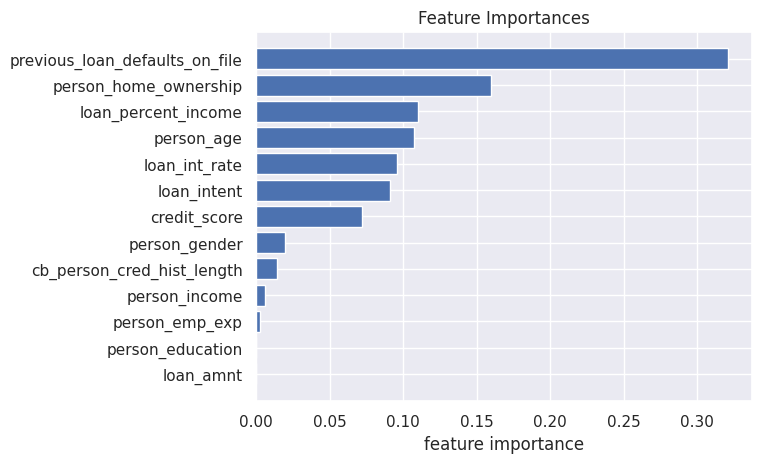

In [84]:
# create plot
fig, ax = plt.subplots()

# create barh axes
ax.barh(y = feature_importances.keys().to_list(), width = feature_importances)

# labels
ax.set_xlabel('feature importance')

# title
ax.set_title('Feature Importances')

## Evaluation on Test Data

In [85]:
# prediction on test data
y_pred_test = clf_tabnet_d.predict(X_test.values)

# model evaluation
precision_d = precision_score(y_test, y_pred_test)
print(f"precision: {precision_d:.4f}")
report_tabnet_d = classification_report(y_test, y_pred_test, output_dict=True)
print(report_tabnet_d)

precision: 0.7293
{'0': {'precision': 0.9584003215434084, 'recall': 0.9085540102876738, 'f1-score': 0.9328117359413203, 'support': 5249.0}, '1': {'precision': 0.7292724196277496, 'recall': 0.862, 'f1-score': 0.7901008249312558, 'support': 1500.0}, 'accuracy': 0.898207141798785, 'macro avg': {'precision': 0.8438363705855789, 'recall': 0.8852770051438369, 'f1-score': 0.861456280436288, 'support': 6749.0}, 'weighted avg': {'precision': 0.90747546558349, 'recall': 0.898207141798785, 'f1-score': 0.9010935011635611, 'support': 6749.0}}


Select the model that yields the better precision.

In [86]:
# selects the model with the higher precision
clf_tabnet = clf_tabnet if precision > precision_d else clf_tabnet_d
report_tabnet = report_tabnet if precision > precision_d else report_tabnet_d
precision = precision if precision > precision_d else precision_d


In [87]:
# store metrics
summary['Model'].append('Neural Network')
summary['Precision'].append(precision)
summary['Recall'].append(report_tabnet['1']['recall'])
summary['F1-score'].append(report_tabnet['1']['f1-score'])

# Summary

Summary of precisions for Neural Networks and TabNet

In [88]:
display(pd.DataFrame(summary))

Model    Recall  Precision  F1-score
0  Neural Network  0.695333   0.906957  0.787170
1  Neural Network  0.862000   0.729272  0.790101